<a href="https://colab.research.google.com/github/LucaForziati/credit_card_approval/blob/main/proyectoFinal_AprobacionTarjetaCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de aprobación de tarjeta de crédito

# Descripción de los datos

Dataset de datos personales y crediticios de un banco sin identificar por cuestiones de privacidad.

Los presentes datos son de clientes reales del banco sin identificar; datos sensibles que podrían ayudar a identificar a las personas del dataset fueron eliminados por cuestiones de privacidad.

Link a Kaggle: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

# Objetivo y alcance

El presente proyecto tiene como finalidad la creación de un sistema capaz de informar y orientar a la persona responsable de tomar la decisión de aprobar o no la entrega de una tarjeta de credito a un potencial cliente. El sistema informará si es recomendable o no entregar el servicio de tarjeta de credito.

La métrica donde recaerá mayor precaución será “precision”. Esto porque se busca minimizar el riesgo de aprobar tarjetas de crédito a clientes que no las usarán de manera responsable. Una Precision alta significa que cuando el modelo aprueba una tarjeta de crédito, es muy probable que el cliente la use de manera responsable.

# Diccionario de datos


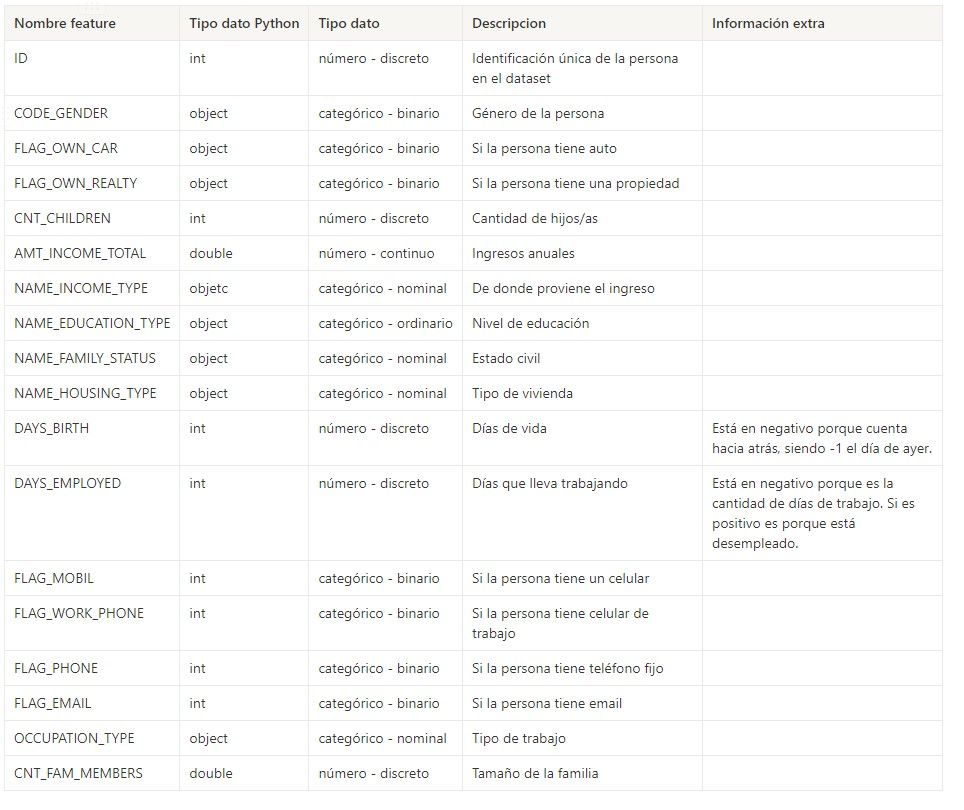

# Importaciones

In [ ]:
pip install squarify

In [ ]:
# basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# missingno
import missingno as msno

# label encoder
from sklearn.preprocessing import LabelEncoder

# grafico treemap
import squarify

# Metricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Transformacion
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

# Bias variance
from mlxtend.evaluate import bias_variance_decomp

# Cross-validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate

# graficos
import plotly.graph_objects as go
import plotly.io as py

# Funciones

In [ ]:
def grafico_metricas(dataset):
  # Tu DataFrame df_metricas_sn1
  metricas = dataset.index
  modelos = dataset.columns

  # Crear una figura vacía
  fig = go.Figure()
  colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
  # Añadir una traza por cada modelo
  for i in range(len(modelos)):
      fig.add_trace(go.Bar(
          x=metricas,
          y=dataset[modelos[i]],
          name=modelos[i],
          marker_color=colores[i]
      ))

  # Añadir algunas características al gráfico
  fig.update_layout(
      title='Métricas por modelo',
      xaxis_tickfont_size=14,
      yaxis=dict(
          title='Valores',
          titlefont_size=16,
          tickfont_size=14,
      ),
      legend=dict(
          x=1.0,
          y=1.0,
          bgcolor='rgba(255, 255, 255, 0)',
          bordercolor='rgba(255, 255, 255, 0)'
      ),
      barmode='group',
      bargap=0.15, # gap between bars of adjacent location coordinates
      bargroupgap=0.1 # gap between bars of the same location coordinate
  )

  # Ajustar el tamaño de la figura aquí
  fig.update_layout(autosize=False, width=1300, height=600)

  fig.show()

In [ ]:
# Funcion para transformar los valores no numericos a numericos y ademas crear un dataframe con los valores originales.

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()
LE = LabelEncoder()

def valores_originales(columna):
  # Aplicar LabelEncoder a la columna
  transformed_columna = label_encoder.fit_transform(c_card[columna])

  # Obtener los valores originales
  original_columna = label_encoder.inverse_transform(transformed_columna)

  # Crear un nuevo DataFrame con las columnas originales y transformadas
  new_df = pd.DataFrame({"columna_original": original_columna, "columna_transformed": transformed_columna})

  # Eliminar valores duplicados y mantener solo una entrada por género
  if (columna == "FLAG_OWN_CAR" or columna == "FLAG_OWN_REALTY" or columna == "NAME_INCOME_TYPE" or columna == "NAME_EDUCATION_TYPE" or columna == "NAME_FAMILY_STATUS" or columna == "NAME_HOUSING_TYPE"):
    unique_columna = new_df.drop_duplicates(subset="columna_transformed")
    c_card[columna] = LE.fit_transform(c_card[columna])
    return unique_columna
  else:
    c_card[columna] = LE.fit_transform(c_card[columna])
    return new_df


  # Transformar al valor
  c_card[columna] = LE.fit_transform(c_card[columna])

# Cargar dataset

In [ ]:
url = "https://raw.githubusercontent.com/LucaForziati/credit_card_approval/main/dataset/application_record.csv"

credit_card = pd.read_csv(url)

# Data Wrangling - visualizacion de los datos crudos


In [ ]:
credit_card.head(500)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5009362,M,Y,N,0,180000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-14867,-586,1,1,0,0,Drivers,2.0
496,5009363,M,Y,N,0,180000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-14867,-586,1,1,0,0,Drivers,2.0
497,5009364,M,Y,N,0,180000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-14867,-586,1,1,0,0,Drivers,2.0
498,5009365,M,Y,N,0,180000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-14867,-586,1,1,0,0,Drivers,2.0


In [ ]:
# Visualizar tamaño del dataset
credit_card.shape

(438557, 18)

In [ ]:
# Informacion general del dataset
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

A primera vista se observa que algunas features del dataset no son del tipo int o double, sino que son objects. Con la finalidad de poder entrenar al modelo, en futuros pasos se transformaran a tipo int.

In [ ]:
# Descripción general del dataset
credit_card.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


A simple vista la mayoria de las features no tienen no una distribucion normal de los datos, entendida esta cuando la media y la mediana tienen valores similares.

La feature "DAYS_BIRTH" parece tener una distribución bastante normal, lo que me lleva a pensar, en una primera aproximación, que el dataset cuenta con muchas personas que se mueven en cierto rango de edad limitado.

**Visualizacion de los datos nulos**

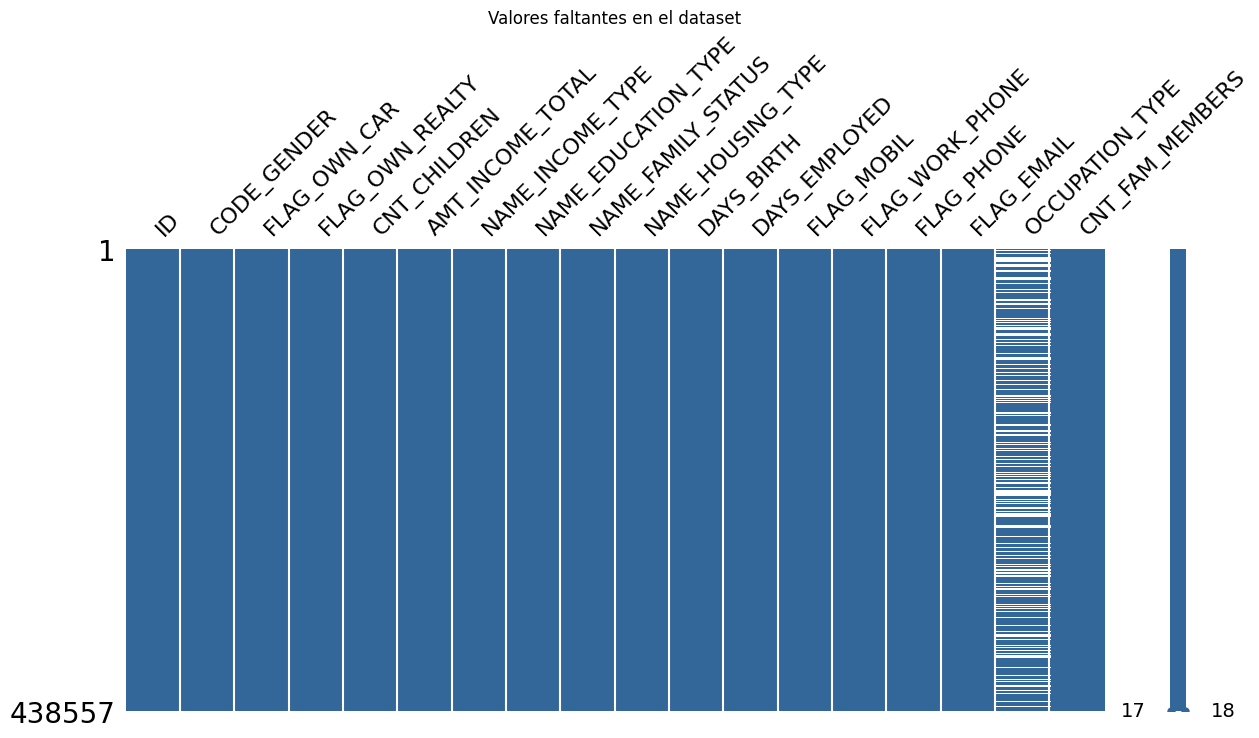

In [ ]:
# Utilizamos missingno para visualizar valores faltantes
matrix_ax = msno.matrix(credit_card, color=(0.2, 0.4, 0.6))
matrix_ax.set_title("Valores faltantes en el dataset")
current_fig = plt.gcf()
current_fig.set_size_inches(14, 6)

In [ ]:
credit_card.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Se puede observar que el dataset en casi todas sus features no cuenta con datos nulos, excepto en "OCCUPATION_TYPE"; siendo este casi el 30%.

Aqui nos encontramos en una disyuntiva entre: a) eliminar la feature, decisión que a priori podria costarle valor predictivo al modelo; b) eliminar todos los registros que cuenten con datos nulos.

En un primer analisis, se consideró que, aplicado en este caso concreto, era mas relevante conservar una feature que podría agregar poder predictivo al modelo, que conservar 134.203 registros.

Luego de realizar una primera pasada y, atento la futura perdida de registros, considero que es mejor eliminar la feature y conservar los registros.

**Visualizacion de valores repetidos**

In [ ]:
# Visualizamos si hay datos repetidos utilizando la funcion duplicate
valores_duplicados = credit_card.duplicated()
valores_duplicados.value_counts()

False    438557
dtype: int64

En principio, la función duplicated() no arroja valores repetidos. Igualmente, se analizará si existen registros repetidos por ID.

In [ ]:
identico_id = credit_card["ID"]
credit_card[identico_id.isin(identico_id[identico_id.duplicated()])].sort_values("ID")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


Como se puede observar, el dataset cuenta con ID identicos; esto, por la misma definicion de ID, no puede suceder. En futuras trasnformaciones se borraran aquellos ID repetidos, siguiendo la logica que el primero que aparece se conserva.

# Data Wrangling - transformando dataset

**Copiar el dataset original**

In [ ]:
# Creamos un nuevo dataset a partir del original para conservar la integridad de este ultimo.
c_card = credit_card.copy() # con el metodo copy creamos una copia del dataset y asi evitamos que futuros cambios afecten al dataset original.

**Eliminar los registros con ID repetidos**

In [ ]:
# Eliminar los registros donde haya ID repetidos
c_card.drop_duplicates(subset="ID", keep="first", inplace=True)
c_card.shape

(438510, 18)

**ID como indice**

In [ ]:
# Establecer la columna ID como indice.
c_card.set_index('ID', inplace=True)

**Eliminar columnas que no son de interes**

In [ ]:
# Eliminar columnas del dataset
c_card = c_card.drop("CODE_GENDER", axis=1)
c_card = c_card.drop("FLAG_WORK_PHONE", axis=1)
c_card = c_card.drop("FLAG_PHONE", axis=1)
c_card = c_card.drop("OCCUPATION_TYPE", axis=1)

Se eliminaron del dataset 4 features:

CODE_GENDER: no se quiere sesgar al modelo con el genero de las personas.

FLAG_WORK_PHONE: se considera irrelevante si la persona tiene celular corporativo.

FLAG_PHONE: hace unos años esta feature podria haber tenido mas sentido. En la actualidad el telefono de hogar se encuentra discontinuado y practicamente todas las personas tienen un celular.

OCCUPATION_TYPE: por la cantidad de registros nulos que cuenta.

**Transformacion de datos a numericos**

In [ ]:
identificador_flag_own_car = valores_originales("FLAG_OWN_CAR")
identificador_flag_own_car

,columna_original,columna_transformed
0,Y,1
3,N,0


In [ ]:
identificador_flag_own_realty = valores_originales("FLAG_OWN_REALTY")
identificador_flag_own_realty

,columna_original,columna_transformed
0,Y,1
19,N,0


In [ ]:
identificador_name_income_type = valores_originales("NAME_INCOME_TYPE")
identificador_name_income_type

,columna_original,columna_transformed
0,Working,4
3,Commercial associate,0
7,Pensioner,1
62,State servant,2
1464,Student,3


In [ ]:
identificador_name_education_type = valores_originales("NAME_EDUCATION_TYPE")
identificador_name_education_type

,columna_original,columna_transformed
0,Higher education,1
2,Secondary / secondary special,4
19,Incomplete higher,2
486,Lower secondary,3
1966,Academic degree,0


In [ ]:
identificador_name_family_status = valores_originales("NAME_FAMILY_STATUS")
identificador_name_family_status

,columna_original,columna_transformed
0,Civil marriage,0
2,Married,1
3,Single / not married,3
7,Separated,2
76,Widow,4


In [ ]:
identificador_name_housing_type = valores_originales("NAME_HOUSING_TYPE")
identificador_name_housing_type

,columna_original,columna_transformed
0,Rented apartment,4
2,House / apartment,1
249,Municipal apartment,2
254,With parents,5
337,Co-op apartment,0
1041,Office apartment,3


**Convertir las columnas "DAYS_BIRTH" y "DAYS_EMPLOYED" a "YEARS_BIRTH" y "MONTH_EMPLOYED"**

In [ ]:
# Convertir "DAYS_BIRTH" a "YEARS_BIRTH"

# pasar los datos a positivos
c_card['DAYS_BIRTH'] = -c_card['DAYS_BIRTH']
# dividir la cantidad de dias en 365 para obtener un estimativo de los años; ademas convertirlo a int
c_card['DAYS_BIRTH'] = (c_card['DAYS_BIRTH'] / 365).astype(int)
# reemplazar el nombre de la columna
c_card.rename(columns={'DAYS_BIRTH': 'YEARS_BIRTH'}, inplace=True)

In [ ]:
# Convertir "DAYS_EMPLOYED" a "DAYS_EMPLOYED"

# pasar los datos a positivos
c_card['DAYS_EMPLOYED'] = -c_card['DAYS_EMPLOYED']
# dividir la cantidad de dias en 30 para obtener un estimativo de los meses que lleva trabajando; ademas convertirlo a int
c_card['DAYS_EMPLOYED'] = (c_card['DAYS_EMPLOYED'] / 30).astype(int)
# reemplazar el nombre de la columna
c_card.rename(columns={'DAYS_EMPLOYED': 'MONTH_EMPLOYED'}, inplace=True)

# Data Wrangling - distribucion


**Outliers**

In [ ]:
c_card

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,MONTH_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,
5008804,1,1,0,427500.0,4,1,0,4,32,151,1,0,2.0
5008805,1,1,0,427500.0,4,1,0,4,32,151,1,0,2.0
5008806,1,1,0,112500.0,4,4,1,1,58,37,1,0,2.0
5008808,0,1,0,270000.0,0,4,3,1,52,101,1,1,1.0
5008809,0,1,0,270000.0,0,4,3,1,52,101,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840104,0,1,0,135000.0,1,4,2,1,62,-12174,1,0,1.0
6840222,0,0,0,103500.0,4,4,3,1,43,100,1,0,1.0
6841878,0,0,0,54000.0,0,1,3,5,22,12,1,0,1.0


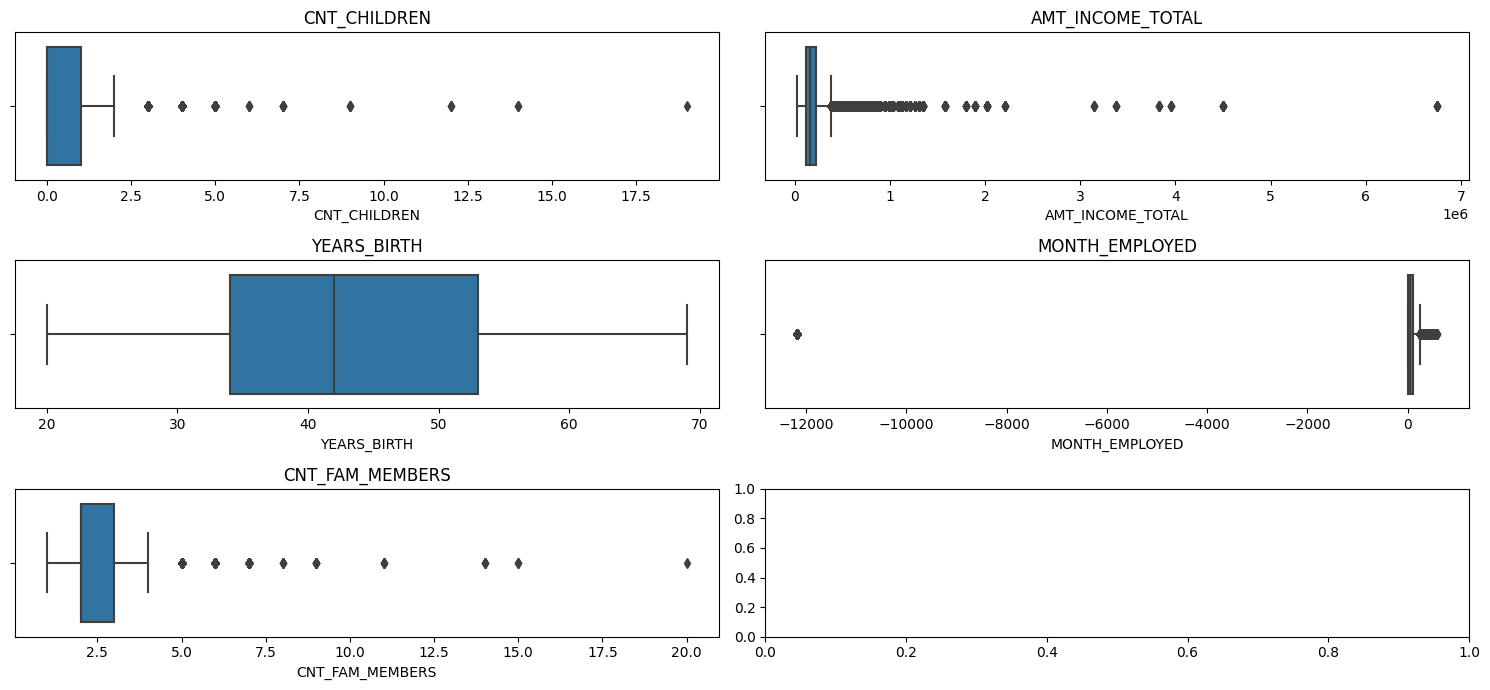

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))
# Grafico 1
sns.boxplot(c_card, x="CNT_CHILDREN", ax=axes[0][0])
axes[0][0].set_title("CNT_CHILDREN")  # Agregar título al subplot

# Grafico 2
sns.boxplot(c_card, x="AMT_INCOME_TOTAL", ax=axes[0][1])
axes[0][1].set_title("AMT_INCOME_TOTAL")  # Agregar título al subplot

# Grafico 3
sns.boxplot(c_card, x="YEARS_BIRTH", ax=axes[1][0])
axes[1][0].set_title("YEARS_BIRTH")  # Agregar título al subplot

# Grafico 4
sns.boxplot(c_card, x="MONTH_EMPLOYED", ax=axes[1][1])
axes[1][1].set_title("MONTH_EMPLOYED")  # Agregar título al subplot

# Grafico 5
sns.boxplot(c_card, x="CNT_FAM_MEMBERS", ax=axes[2][0])
axes[2][0].set_title("CNT_FAM_MEMBERS")  # Agregar título al subplot

# Ajustar el espaciado entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()

De analísis de outliers se descartaron las features categorias y solo se analizaron las numéricas.

CNT_CHILDREN: Se puede observer que la mayoria de los clientes tiene 1 o 2 hijos o no tiene ninguno, todo lo demas es outlier. Para no limitar el poder predictivo del modelo, solo se eliminaran quellos registros donde el numero de hijos sea mayor a 5.

AMT_INCOME_TOTAL: En primer termino, la escala del eje x está en notación cientifica; por lo tanto, el valor debe multiplicarse por 10 elevado a 6. Hecha esta aclaración, se puede observar que la mayoria de los ingresos anuales de los clientes se encuentra entre 0 y 200.000. Se eliminaran del dataset todos aquellos registros donde el ingreso anual sea mayora 1.000.000.

YEARS_BIRTH: No posee outliers, casi todos los clientes se encuentran en un rango de edad similar.

MONTH_EMPLOYED: Se puede visualizar que, luego de hacer la transformación, se conservó un valor atipico que representa dias trabajando. Se eliminará este regristro y, ademas, se eliminaran aquellos valores que superen 250 meses. Si bien es posible que una persona trabaje mas de 20 años en una misma organización, con la finlidad de evitar problemas a la hora de entrenar el modelo, se procederá a eliminarlos.

CNT_FAM_MEMBERS: Atendiendo a la logica aplicada con la feature "CNT_CHILDREN"; se eliminaran todos los registros que sean superior a 7.

In [ ]:
# Eliminar los outliers no deseados

c_card = c_card.drop(c_card[c_card["CNT_CHILDREN"] > 5].index)
c_card = c_card.drop(c_card[c_card["AMT_INCOME_TOTAL"] > 500000].index)
c_card = c_card.drop(c_card[c_card["MONTH_EMPLOYED"] > 180 ].index)
c_card = c_card.drop(c_card[c_card["MONTH_EMPLOYED"] < 0 ].index)
c_card = c_card.drop(c_card[c_card["CNT_CHILDREN"] > 7].index)

**Distribucion**

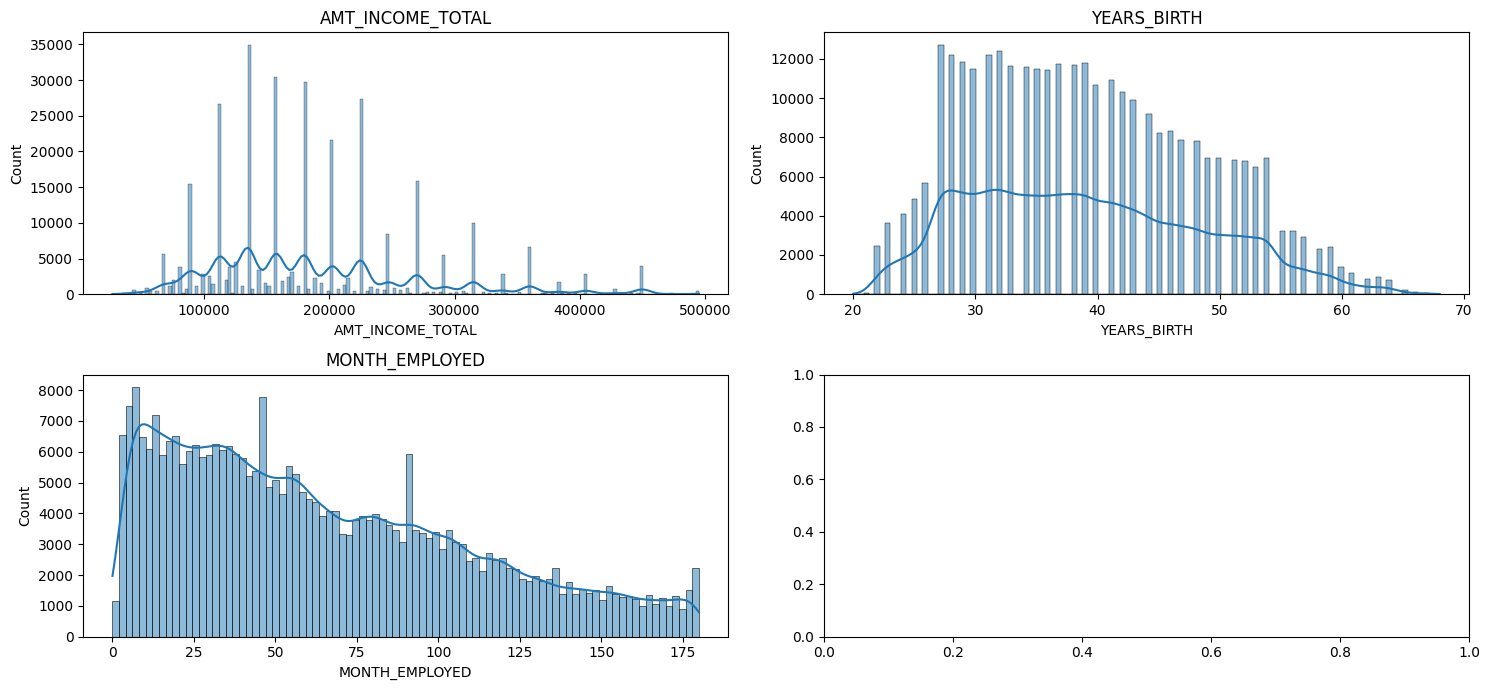

In [ ]:
# Grafico histplot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

# Grafico 1
sns.histplot(c_card, x="AMT_INCOME_TOTAL", ax=axes[0][0], kde=True,)
axes[0][0].set_title("AMT_INCOME_TOTAL")  # Agregar título al subplot

# Grafico 2
sns.histplot(c_card, x="YEARS_BIRTH", ax=axes[0][1], kde=True,)
axes[0][1].set_title("YEARS_BIRTH")  # Agregar título al subplot

# Grafico 3
sns.histplot(c_card, x="MONTH_EMPLOYED", ax=axes[1][0], kde=True,)
axes[1][0].set_title("MONTH_EMPLOYED")  # Agregar título al subplot


# Ajustar el espaciado entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()

En relación a la distribución de los datos utilizando histplot solo se tomaron 3 features, las restantes serán analizadas con diferentes graficos.

AMT_INCOME_TOTAL: El dataset cuenta con una asimetria positiva, con una curtorsis platicurtica.

YEARS_BIRTH: El dataset cuenta con una asimetria negativa aunque bastante normal, no se detecta curtosis.

MONTH_EMPLOYED: El dataset cuenta con una asimetria positiva con una curtosis Platicurtica.

# EDA

# EDA - univariado

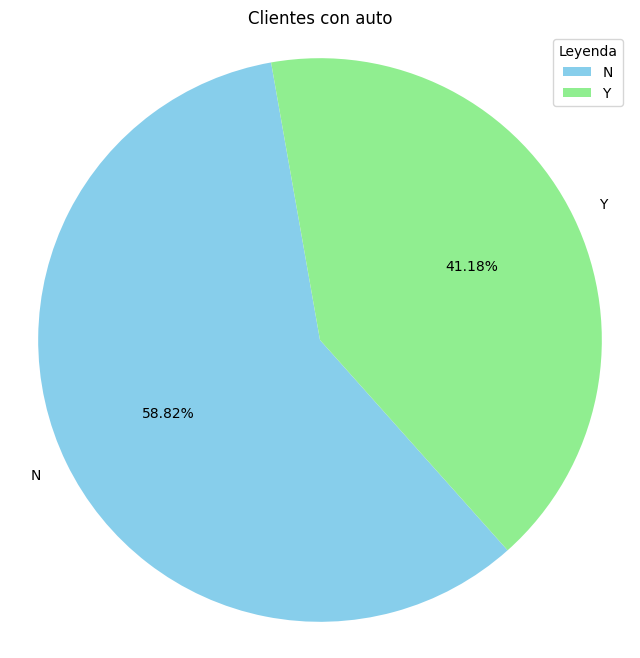

In [ ]:
# Grafico de torta clientes que tienen auto

# Recupeando los datos
valores = c_card['FLAG_OWN_CAR'].value_counts()
cantidades = c_card['FLAG_OWN_CAR'].value_counts().tolist()

# Recuperando los datos originales
etiquetas = []

etiquetas.append(identificador_flag_own_car.loc[identificador_flag_own_car['columna_transformed'] == valores.index[0], "columna_original"].iloc[0])
etiquetas.append(identificador_flag_own_car.loc[identificador_flag_own_car['columna_transformed'] == valores.index[1], "columna_original"].iloc[0])

# Colores
colores = ['skyblue', 'lightgreen']

# Grafico 1
plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=etiquetas, autopct='%1.2f%%', startangle=100, colors = colores)
plt.title('Clientes con auto')
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.legend(title='Leyenda', loc='upper right', labels=etiquetas)
plt.show()

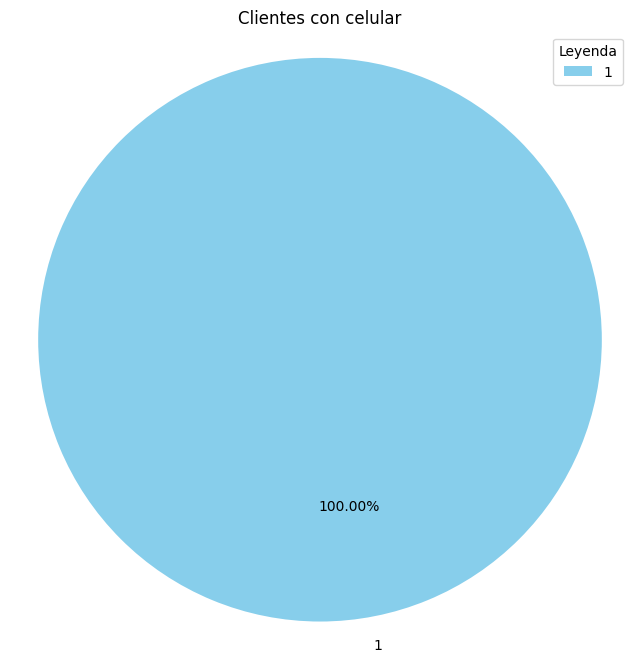

In [ ]:
# Grafico de torta clientes que tienen celular

# Recupeando los datos
valores = c_card['FLAG_MOBIL'].value_counts()
cantidades = c_card['FLAG_MOBIL'].value_counts().tolist()

# Recuperando los datos originales
etiquetas = []

etiquetas.append(valores.index[0])


# Colores
colores = ['skyblue', 'lightgreen']

# Grafico 1
plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=etiquetas, autopct='%1.2f%%', startangle=100, colors = colores)
plt.title('Clientes con celular')
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.legend(title='Leyenda', loc='upper right', labels=etiquetas)
plt.show()

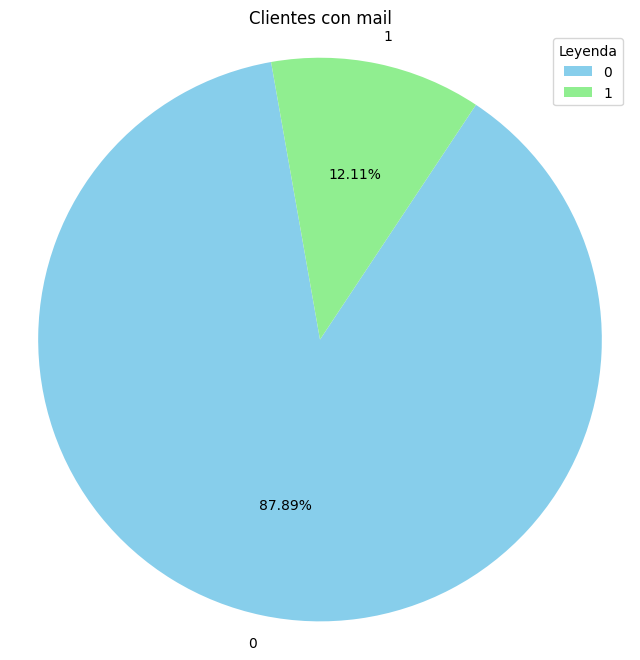

In [ ]:
# Grafico de torta clientes que tienen mail

# Recupeando los datos
valores = c_card['FLAG_EMAIL'].value_counts()
cantidades = c_card['FLAG_EMAIL'].value_counts().tolist()

# Recuperando los datos originales
etiquetas = []

etiquetas.append(valores.index[0])
etiquetas.append(valores.index[1])

# Colores
colores = ['skyblue', 'lightgreen']

# Grafico 1
plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=etiquetas, autopct='%1.2f%%', startangle=100, colors = colores)
plt.title('Clientes con mail')
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.legend(title='Leyenda', loc='upper right', labels=etiquetas)
plt.show()


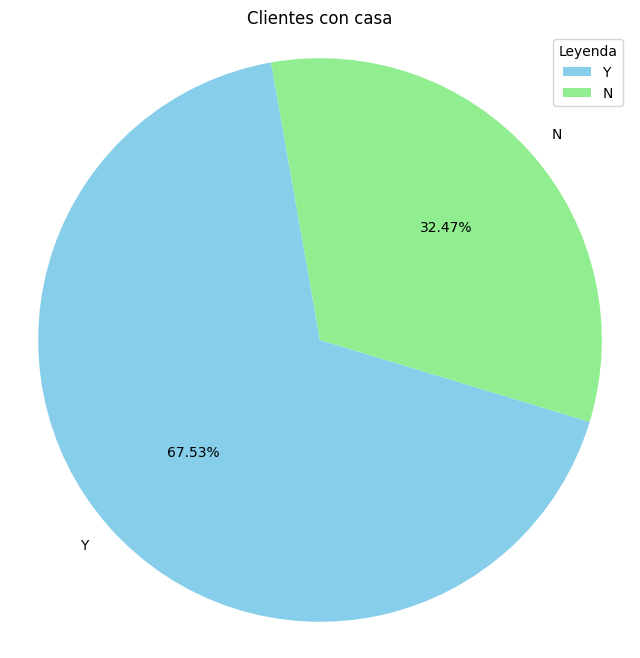

In [ ]:
# Grafico de torta clientes que tienen casa

# Recupeando los datos
valores = c_card['FLAG_OWN_REALTY'].value_counts()
cantidades = c_card['FLAG_OWN_REALTY'].value_counts().tolist()

# Recuperando los datos originales
etiquetas = []
etiquetas.append(identificador_flag_own_realty.loc[identificador_flag_own_realty['columna_transformed'] == valores.index[0], "columna_original"].iloc[0])
etiquetas.append(identificador_flag_own_realty.loc[identificador_flag_own_realty['columna_transformed'] == valores.index[1], "columna_original"].iloc[0])

# Colores
colores = ['skyblue', 'lightgreen']


# Grafico 1
plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=etiquetas, autopct='%1.2f%%', startangle=100, colors = colores)
plt.title('Clientes con casa')
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.legend(title='Leyenda', loc='upper right', labels=etiquetas)
plt.show()

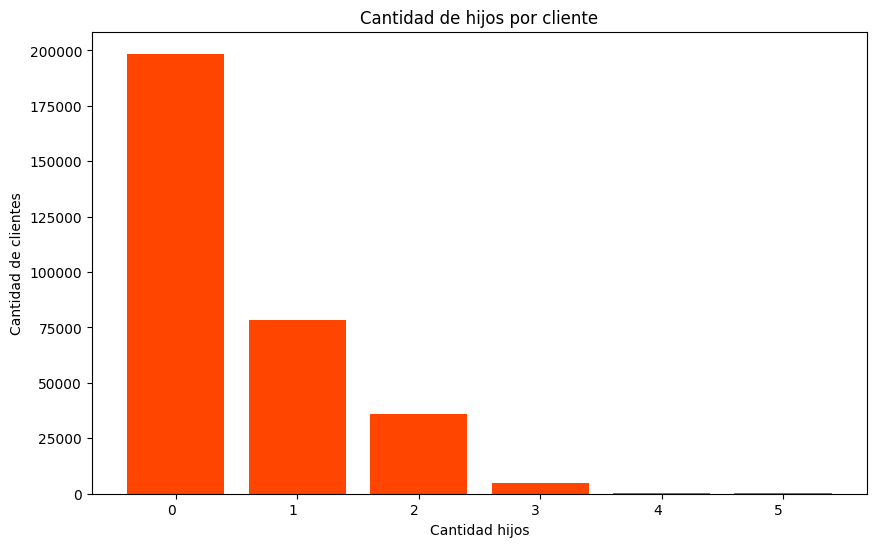

In [ ]:
# Contar la frecuencia de cantidad de hijos
hijos_frecuencia = c_card['CNT_CHILDREN'].value_counts().sort_index()

cantidad_hijos = hijos_frecuencia.index.tolist()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cantidad_hijos, hijos_frecuencia,color='orangered')
plt.xlabel('Cantidad hijos')
plt.ylabel('Cantidad de clientes')
plt.title('Cantidad de hijos por cliente')
plt.xticks(ha="right")
plt.show()

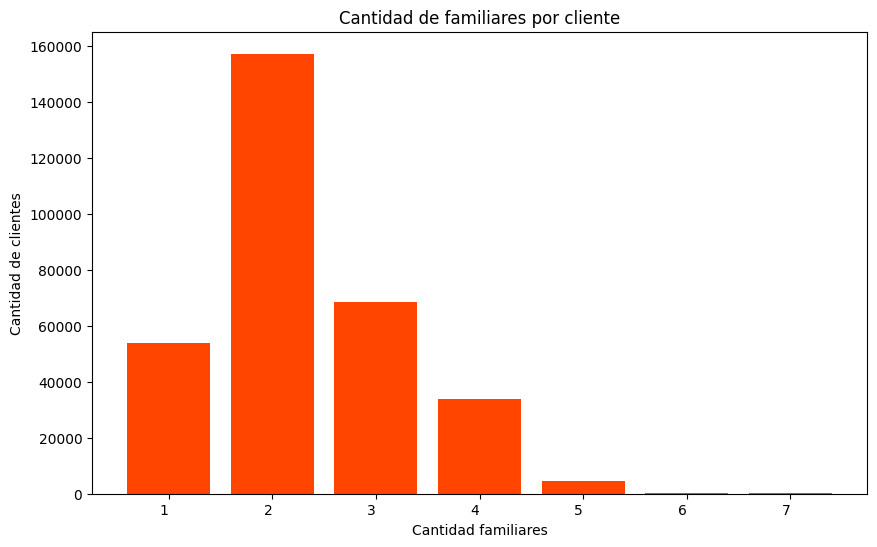

In [ ]:
# Contar la frecuencia de cantidad de familiares
familia_frecuencia = c_card['CNT_FAM_MEMBERS'].value_counts().sort_index()

cantidad_familia = familia_frecuencia.index.tolist()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cantidad_familia, familia_frecuencia,color='orangered')
plt.xlabel('Cantidad familiares')
plt.ylabel('Cantidad de clientes')
plt.title('Cantidad de familiares por cliente')
plt.xticks(ha="right")
plt.show()

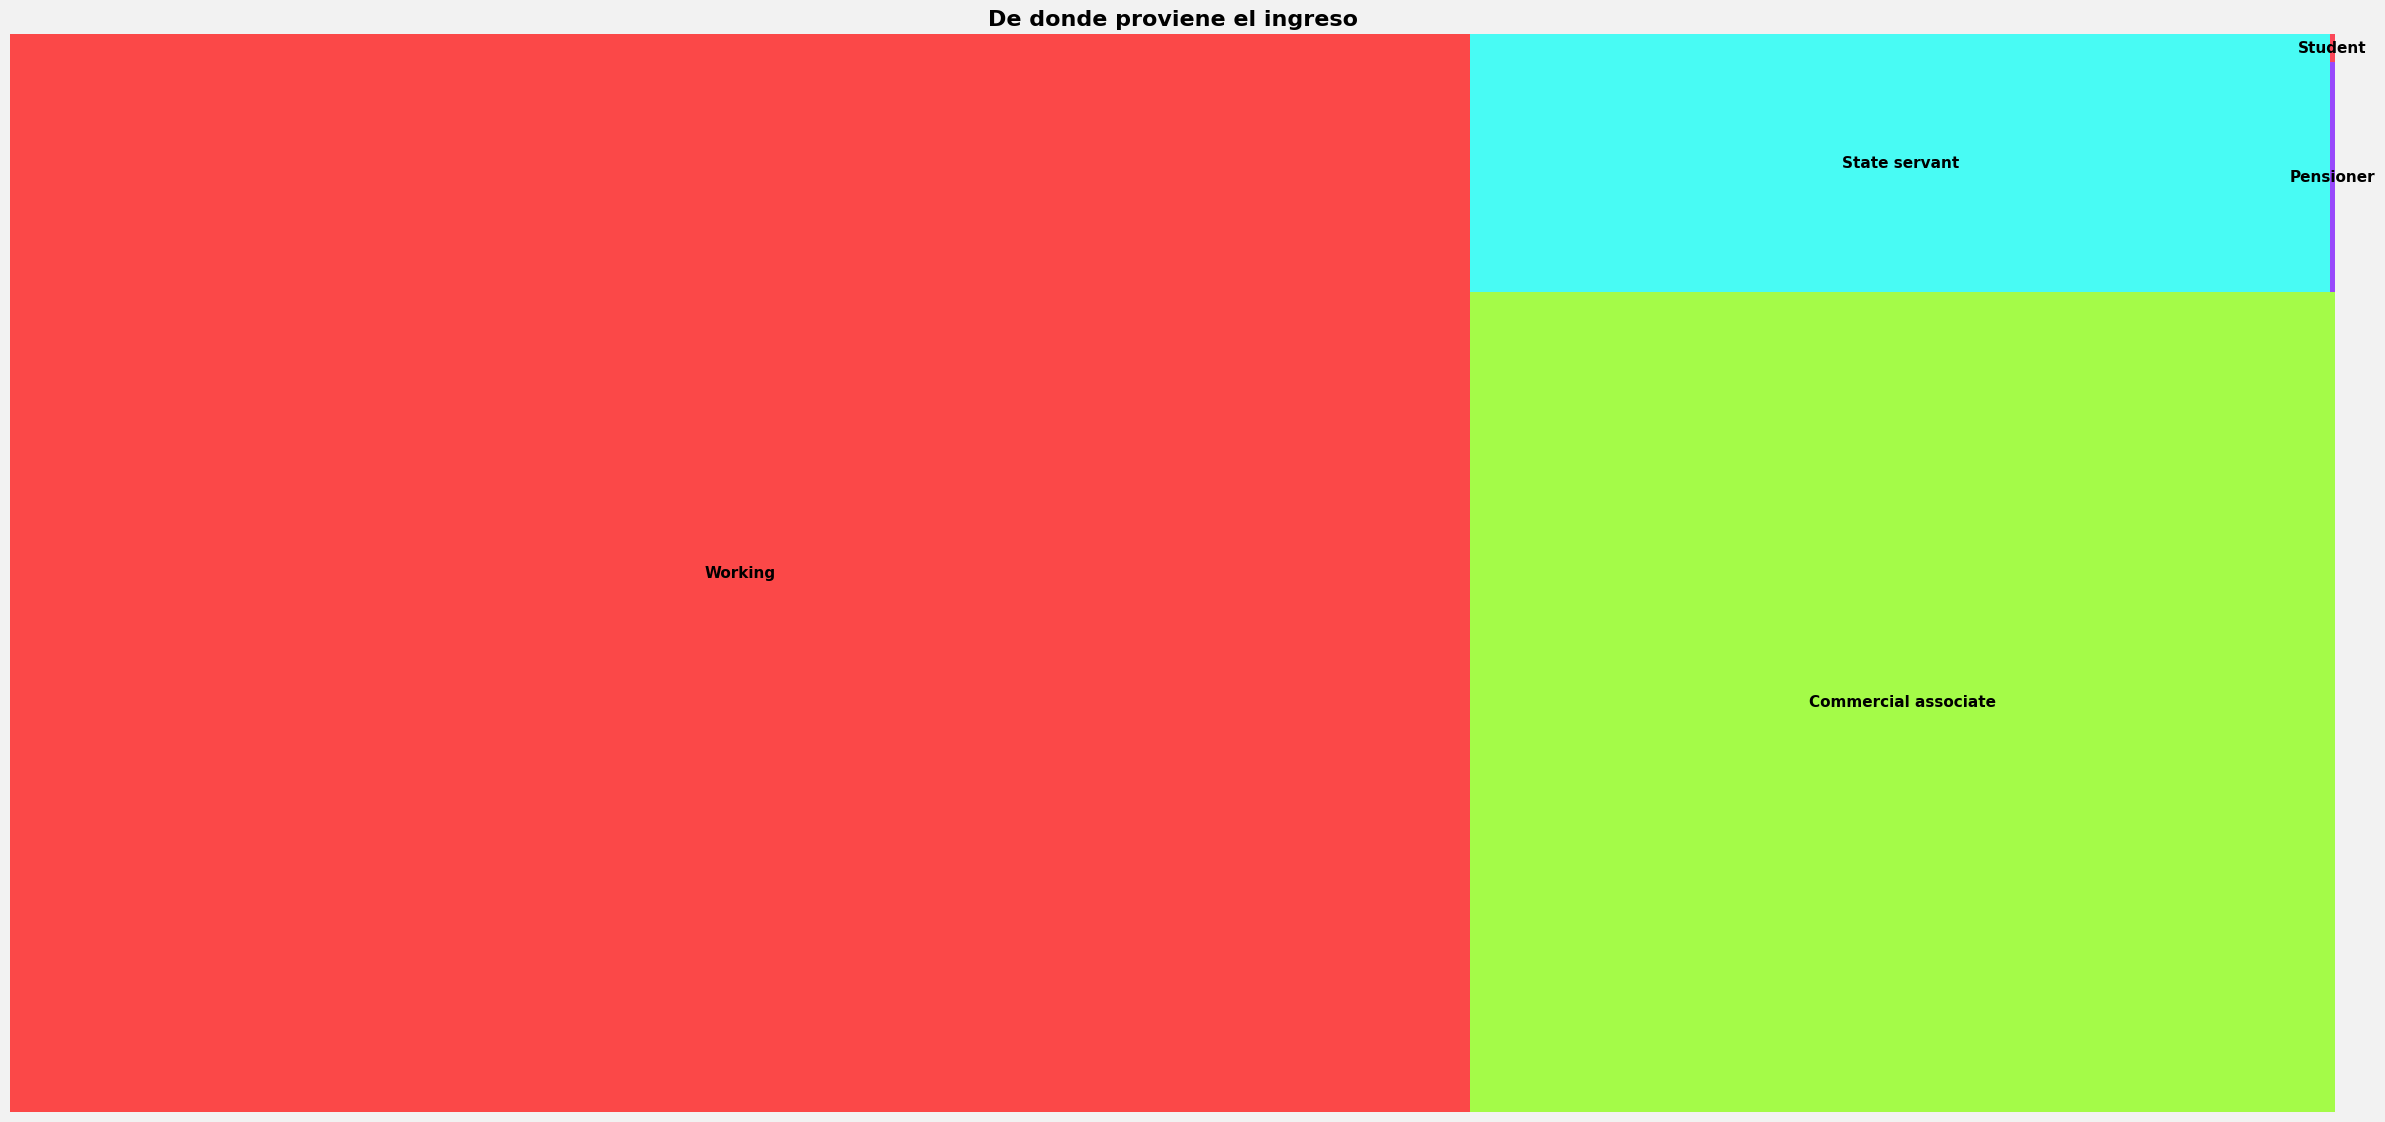

In [ ]:
# Grafico treemapNAME_INCOME_TYPE

conteo_tipo_ingreso = c_card['NAME_INCOME_TYPE'].value_counts()
lista_tipo_ingreso = list(zip(conteo_tipo_ingreso.index, conteo_tipo_ingreso.values))

# Extraer géneros y conteos por separado
tipo_ingreso = [item[0] for item in lista_tipo_ingreso]
conteos = [item[1] for item in lista_tipo_ingreso]

# colores
hues = np.linspace(0, 1, len(tipo_ingreso))
colors = [plt.cm.hsv(hue) for hue in hues]

# Recuperando nombre genero
nombre_tipo_genero = []

for i in tipo_ingreso:

  nombre_tipo_genero.append(identificador_name_income_type.loc[identificador_name_income_type['columna_transformed'] == i, 'columna_original'].iloc[0])


# Crear el treemap
plt.figure(figsize=(30, 14), facecolor='#F2F2F2')
plt.title("De donde proviene el ingreso", fontsize=16, fontweight='bold')
plt.axis('off')

squarify.plot(
    sizes=conteos,
    label=nombre_tipo_genero,
    alpha=0.7,
    color=colors,
    text_kwargs={'fontsize': 11, 'fontweight': 'bold'})

plt.show()


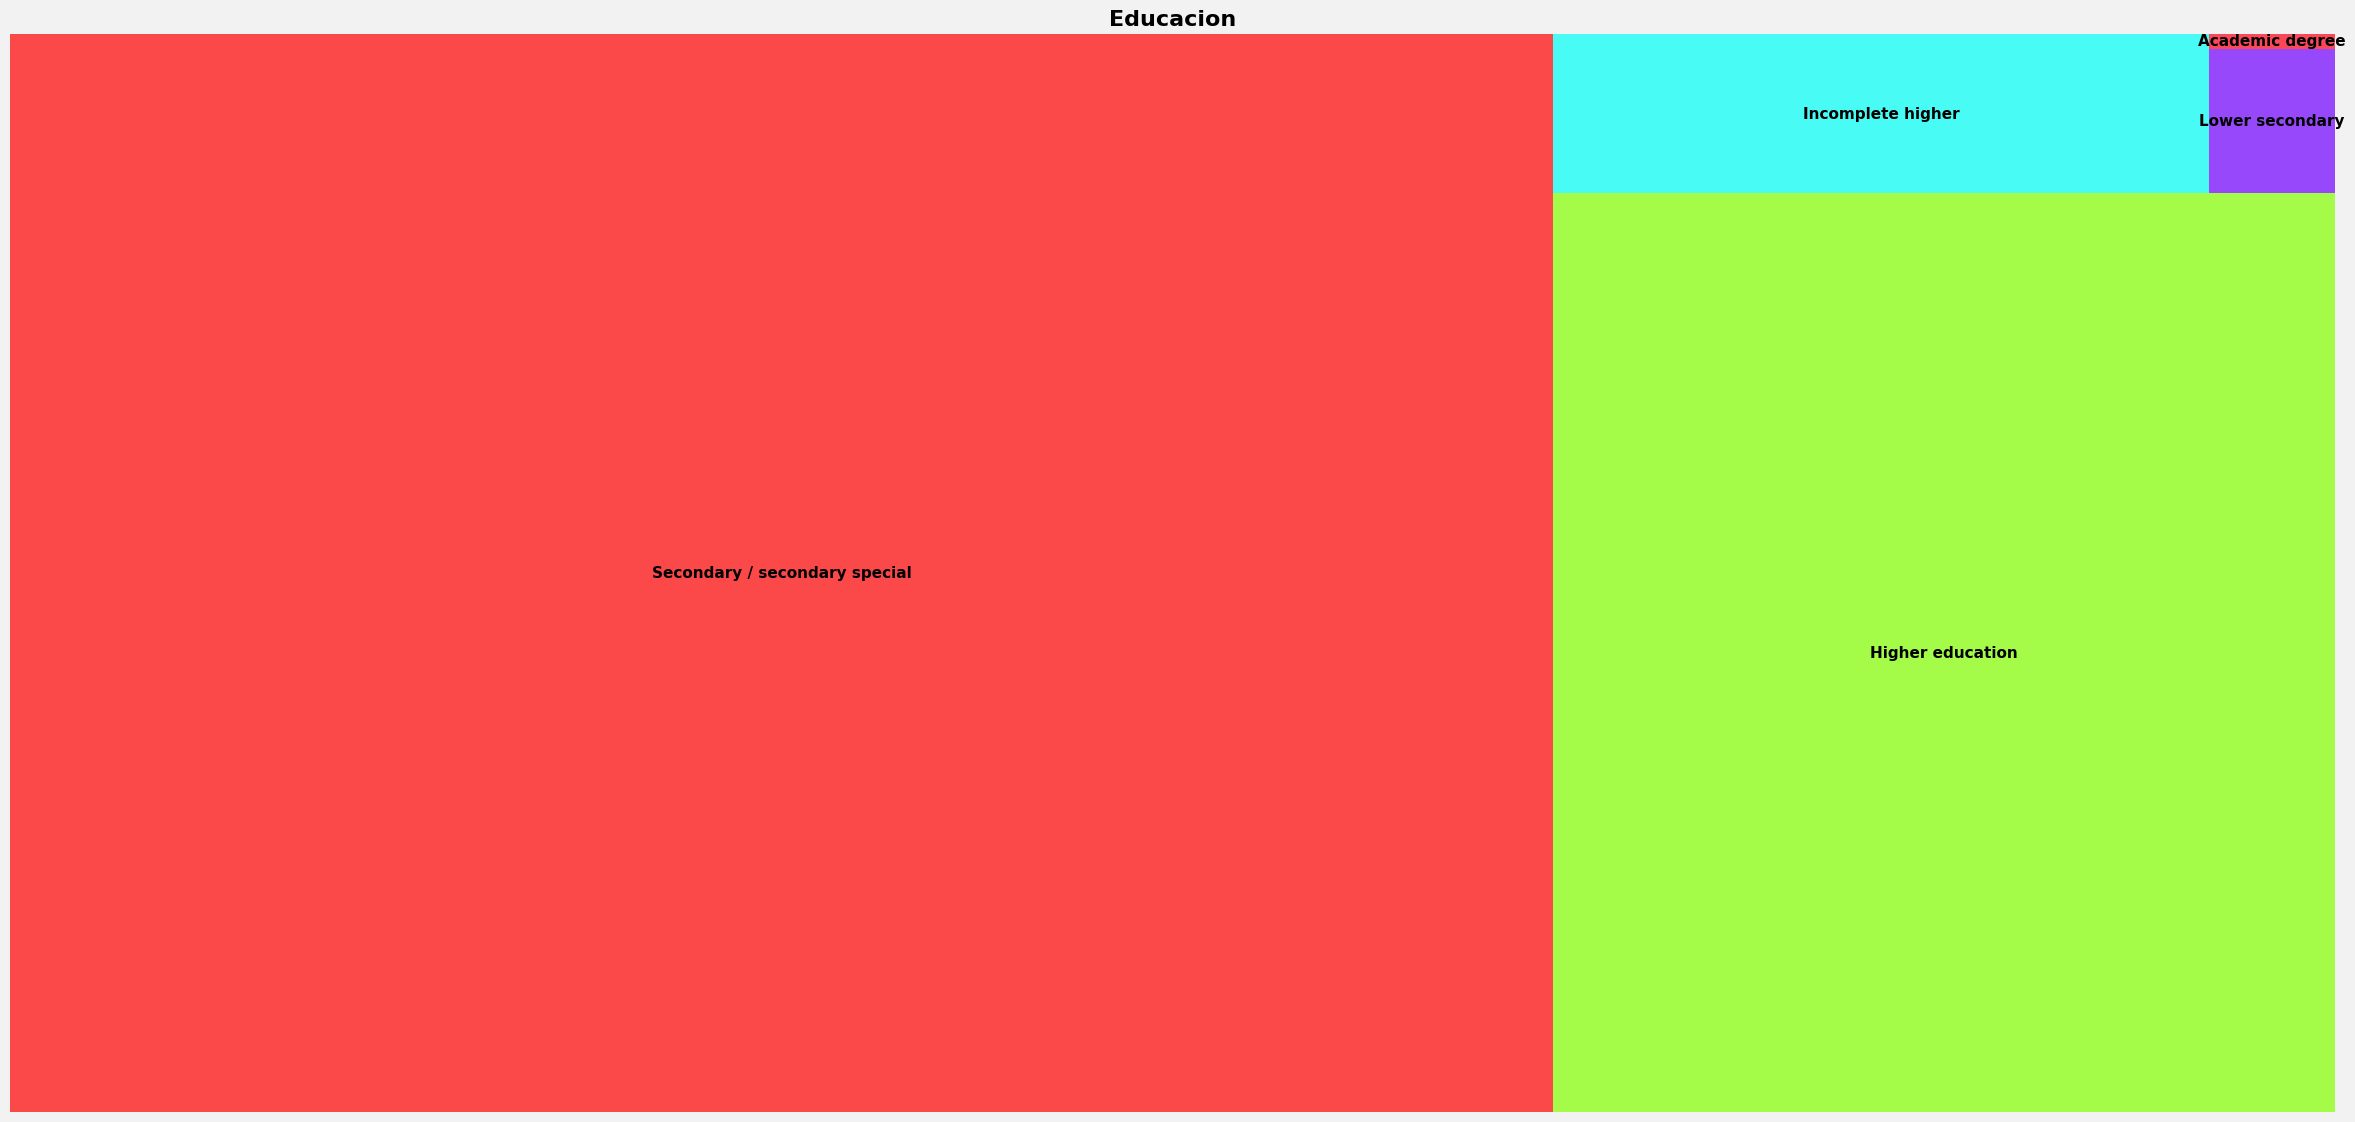

In [ ]:
# Grafico treemap

conteo_tipo_educacion = c_card['NAME_EDUCATION_TYPE'].value_counts()
lista_tipo_educacion = list(zip(conteo_tipo_educacion.index, conteo_tipo_educacion.values))

# Extraer géneros y conteos por separado
tipo_educacion = [item[0] for item in lista_tipo_educacion]
conteos = [item[1] for item in lista_tipo_educacion]

# colores
hues = np.linspace(0, 1, len(tipo_educacion))
colors = [plt.cm.hsv(hue) for hue in hues]

# Recuperando nombre genero
nombre_tipo_educacion = []

for i in tipo_educacion:

  nombre_tipo_educacion.append(identificador_name_education_type.loc[identificador_name_education_type['columna_transformed'] == i, 'columna_original'].iloc[0])


# Crear el treemap
plt.figure(figsize=(30, 14), facecolor='#F2F2F2')
plt.title("Educacion", fontsize=16, fontweight='bold')
plt.axis('off')

squarify.plot(
    sizes=conteos,
    label=nombre_tipo_educacion,
    alpha=0.7,
    color=colors,
    text_kwargs={'fontsize': 11, 'fontweight': 'bold'})

plt.show()

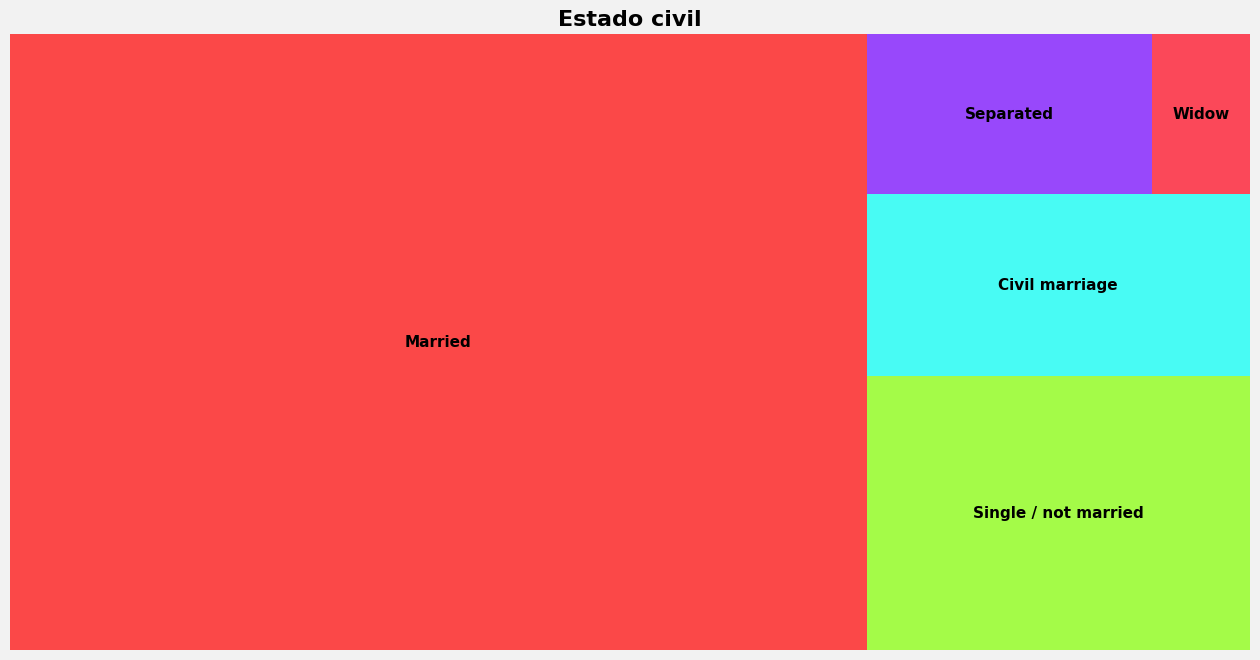

In [ ]:
# Grafico treemap

conteo_tipo_civil = c_card['NAME_FAMILY_STATUS'].value_counts()
lista_tipo_civil = list(zip(conteo_tipo_civil.index, conteo_tipo_civil.values))

# Extraer géneros y conteos por separado
tipo_civil = [item[0] for item in lista_tipo_civil]
conteos = [item[1] for item in lista_tipo_civil]

# colores
hues = np.linspace(0, 1, len(tipo_civil))
colors = [plt.cm.hsv(hue) for hue in hues]

# Recuperando nombre genero
nombre_tipo_civil = []

for i in tipo_civil:

  nombre_tipo_civil.append(identificador_name_family_status.loc[identificador_name_family_status['columna_transformed'] == i, 'columna_original'].iloc[0])


# Crear el treemap
plt.figure(figsize=(16, 8), facecolor='#F2F2F2')
plt.title("Estado civil", fontsize=16, fontweight='bold')
plt.axis('off')

squarify.plot(
    sizes=conteos,
    label=nombre_tipo_civil,
    alpha=0.7,
    color=colors,
    text_kwargs={'fontsize': 11, 'fontweight': 'bold'})

plt.show()

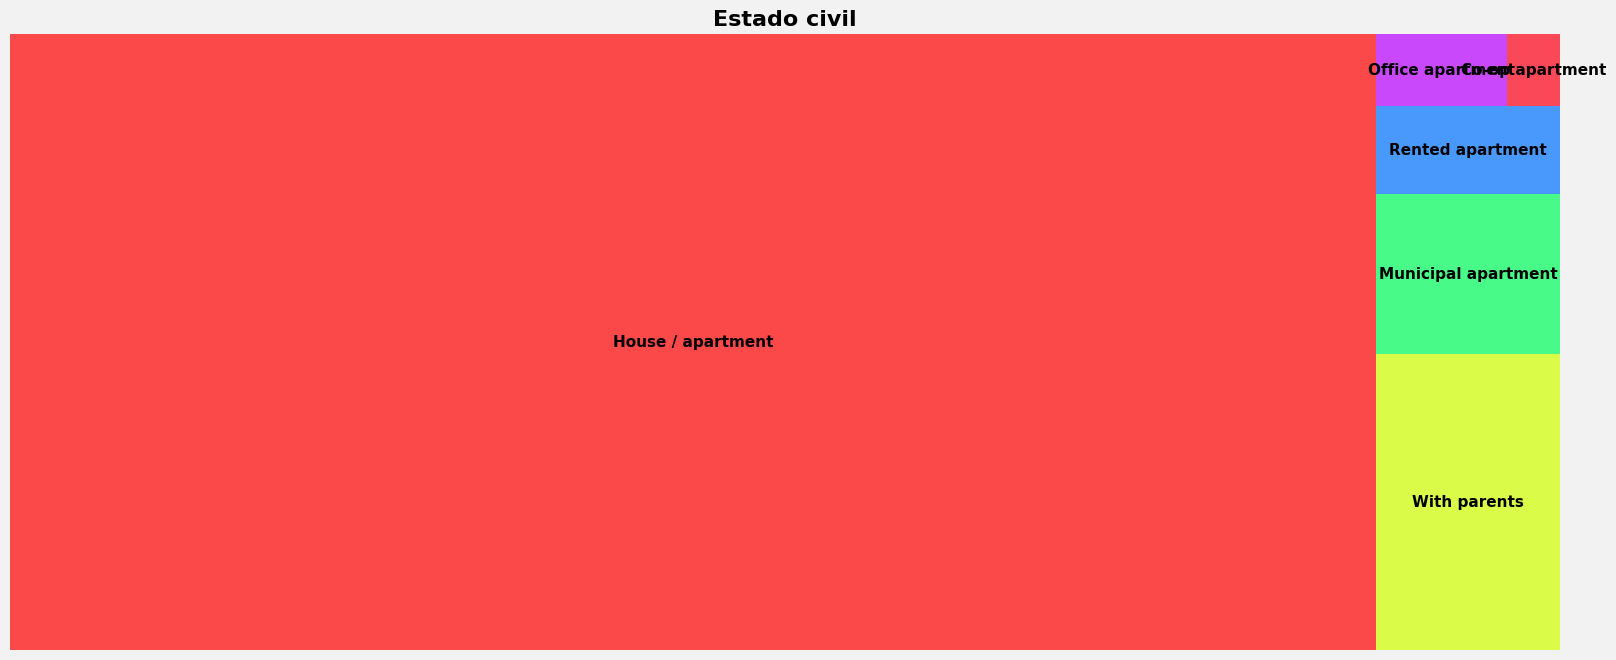

In [ ]:
# Grafico treemap NAME_HOUSING_TYPE

conteo_tipo_vivienda = c_card['NAME_HOUSING_TYPE'].value_counts()
lista_tipo_vivienda = list(zip(conteo_tipo_vivienda.index, conteo_tipo_vivienda.values))

# Extraer géneros y conteos por separado
tipo_vivienda = [item[0] for item in lista_tipo_vivienda]
conteos = [item[1] for item in lista_tipo_vivienda]

# colores
hues = np.linspace(0, 1, len(tipo_vivienda))
colors = [plt.cm.hsv(hue) for hue in hues]

# Recuperando nombre genero
nombre_tipo_vivienda = []

for i in tipo_vivienda:

  nombre_tipo_vivienda.append(identificador_name_housing_type.loc[identificador_name_housing_type['columna_transformed'] == i, 'columna_original'].iloc[0])


# Crear el treemap
plt.figure(figsize=(20, 8), facecolor='#F2F2F2')
plt.title("Estado civil", fontsize=16, fontweight='bold')
plt.axis('off')

squarify.plot(
    sizes=conteos,
    label=nombre_tipo_vivienda,
    alpha=0.7,
    color=colors,
    text_kwargs={'fontsize': 11, 'fontweight': 'bold'})

plt.show()

# EDA - bivariado

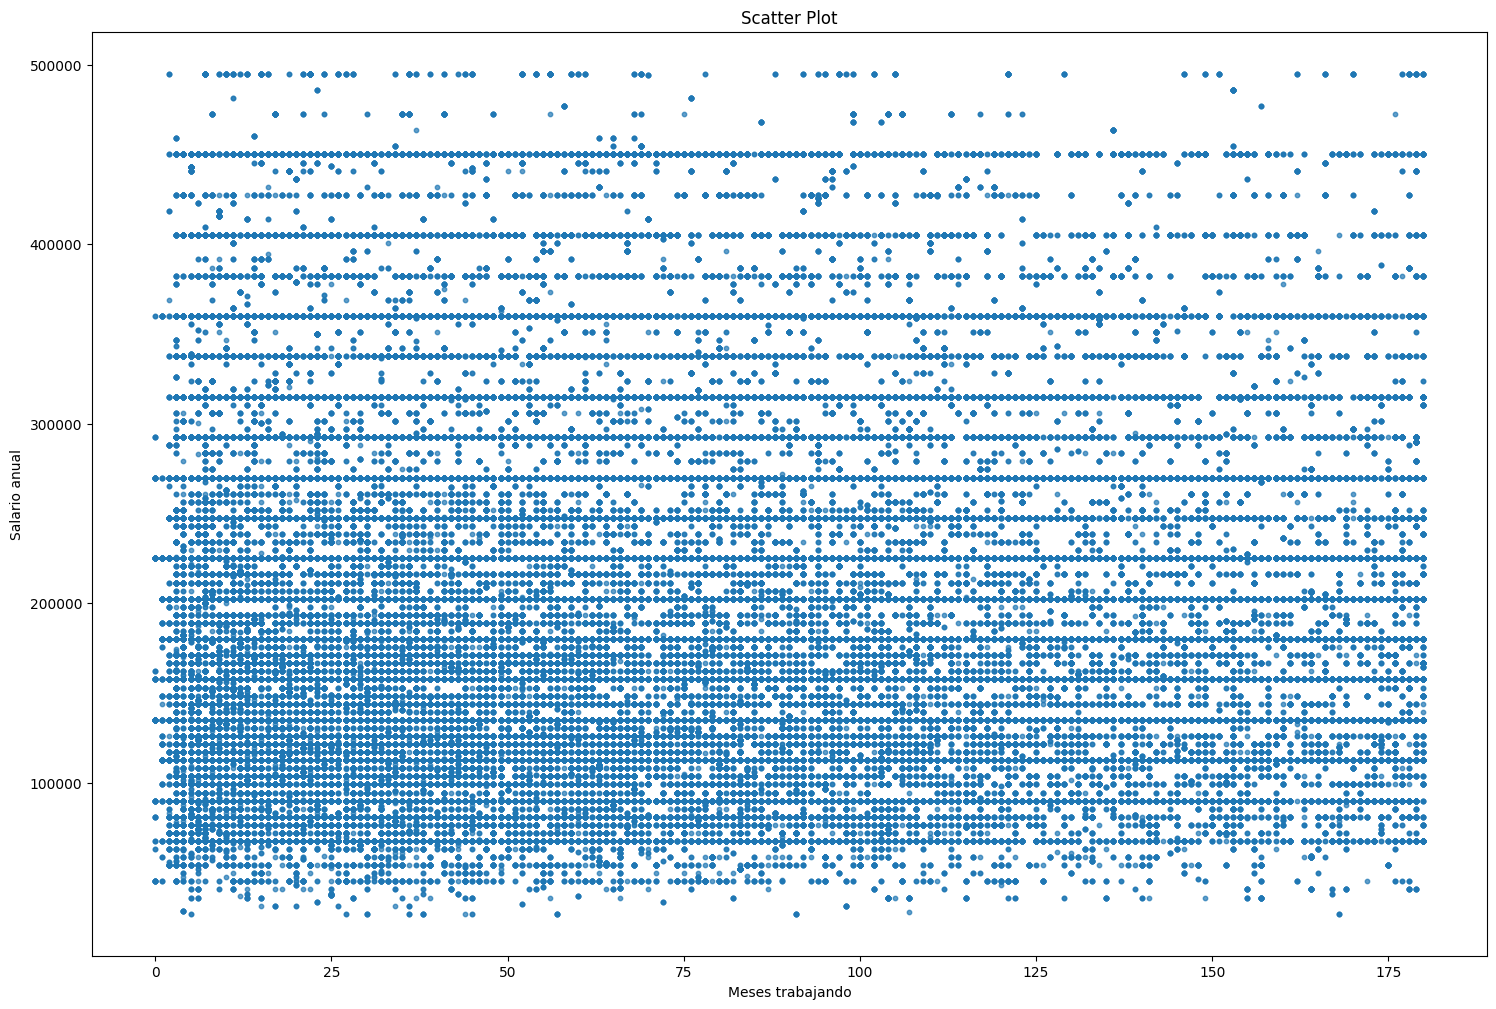

In [ ]:
plt.figure(figsize=(18, 12))
plt.scatter(c_card['MONTH_EMPLOYED'], c_card['AMT_INCOME_TOTAL'], s=10, alpha=0.7)

plt.xlabel('Meses trabajando')
plt.ylabel('Salario anual')
plt.title('Scatter Plot')
plt.show()

El grafico muestra que, en relación al salario, aquellos clientes que llevan trabajando menos dias son aquellas que personas que cobran menos; aunque existen varias excepciones.

Por otro lado, algo que llamó mi atención fueron las lineas tan marcadas. Parecerian ser empleos o trabajos que el salario no varia en relación al paso del tiempo.

In [ ]:
# Entendiendo que son esas lineas

# Contabilizando los diferentes salarios
valores_salario = c_card["AMT_INCOME_TOTAL"].value_counts()
# Contabilizando aquellos registros donde los valores del salario sean mayores a 10000
repetidos_salario = valores_salario[valores_salario > 10000]
# Llevarlo a lista para poder recorrerlo
valores_salario_lista = repetidos_salario.index.tolist()
# Se tryhardean los datos para saber visualizar si ocurre algo
df_salarios_repetidos = c_card.loc[c_card["AMT_INCOME_TOTAL"] == valores_salario_lista[0]]
registros_similares_tryhard = df_salarios_repetidos.loc[
    (c_card["NAME_EDUCATION_TYPE"] == 4) &
    (c_card["FLAG_OWN_REALTY"] == 1) &
    (c_card["YEARS_BIRTH"] == 48) &
    (c_card["MONTH_EMPLOYED"] == 39)
    ]
registros_similares_tryhard

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,MONTH_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,
5008819,1,1,0,135000.0,0,4,1,1,48,39,1,0,2.0
5008820,1,1,0,135000.0,0,4,1,1,48,39,1,0,2.0
5008821,1,1,0,135000.0,0,4,1,1,48,39,1,0,2.0
5008822,1,1,0,135000.0,0,4,1,1,48,39,1,0,2.0
5008823,1,1,0,135000.0,0,4,1,1,48,39,1,0,2.0
5008824,1,1,0,135000.0,0,4,1,1,48,39,1,0,2.0


Podemos visualizar que hay varios registros que cuentan con valores identicos solo cambiando su ID. Esto se puede deber a dos cuestiones: a) se da la casualidad que hay varios clientes con ID continuo que poseen los mismos datos; b) son valores repetidos para incrementar el dataset.

In [ ]:
# Utilizamos la funcion duplicated para buscar repetidos
registros_iguales = c_card.duplicated(keep=False).sum()
registros_iguales

307112

Observamos que gran parte del dataset son columnas que, en algun punto, se repiten con otras. En un primer analisis esto no surgia porque los ID si son diferentes. Al haber establecido al ID como indice, se puede visualizar cuantas repeticiones hay en el dataset.

Como esta pensada la variable "registros_iguales" no es que los 277.295 registros son iguales, sino que hay columnas que se repiten entre si.

Por lo tanto, a la pregunta del significado de la linea, que derivo en esto, llego a la conclusion que es una mera casualidad, esto se debe a que diferentes trabajos y puestos toman esa remuneración. Casualidad del dataset.

En segundo termino, se pudieron observar que muchos registros tienen valores identicos solo que varian en su ID. Esto no puede ser tomado como una casualidad.

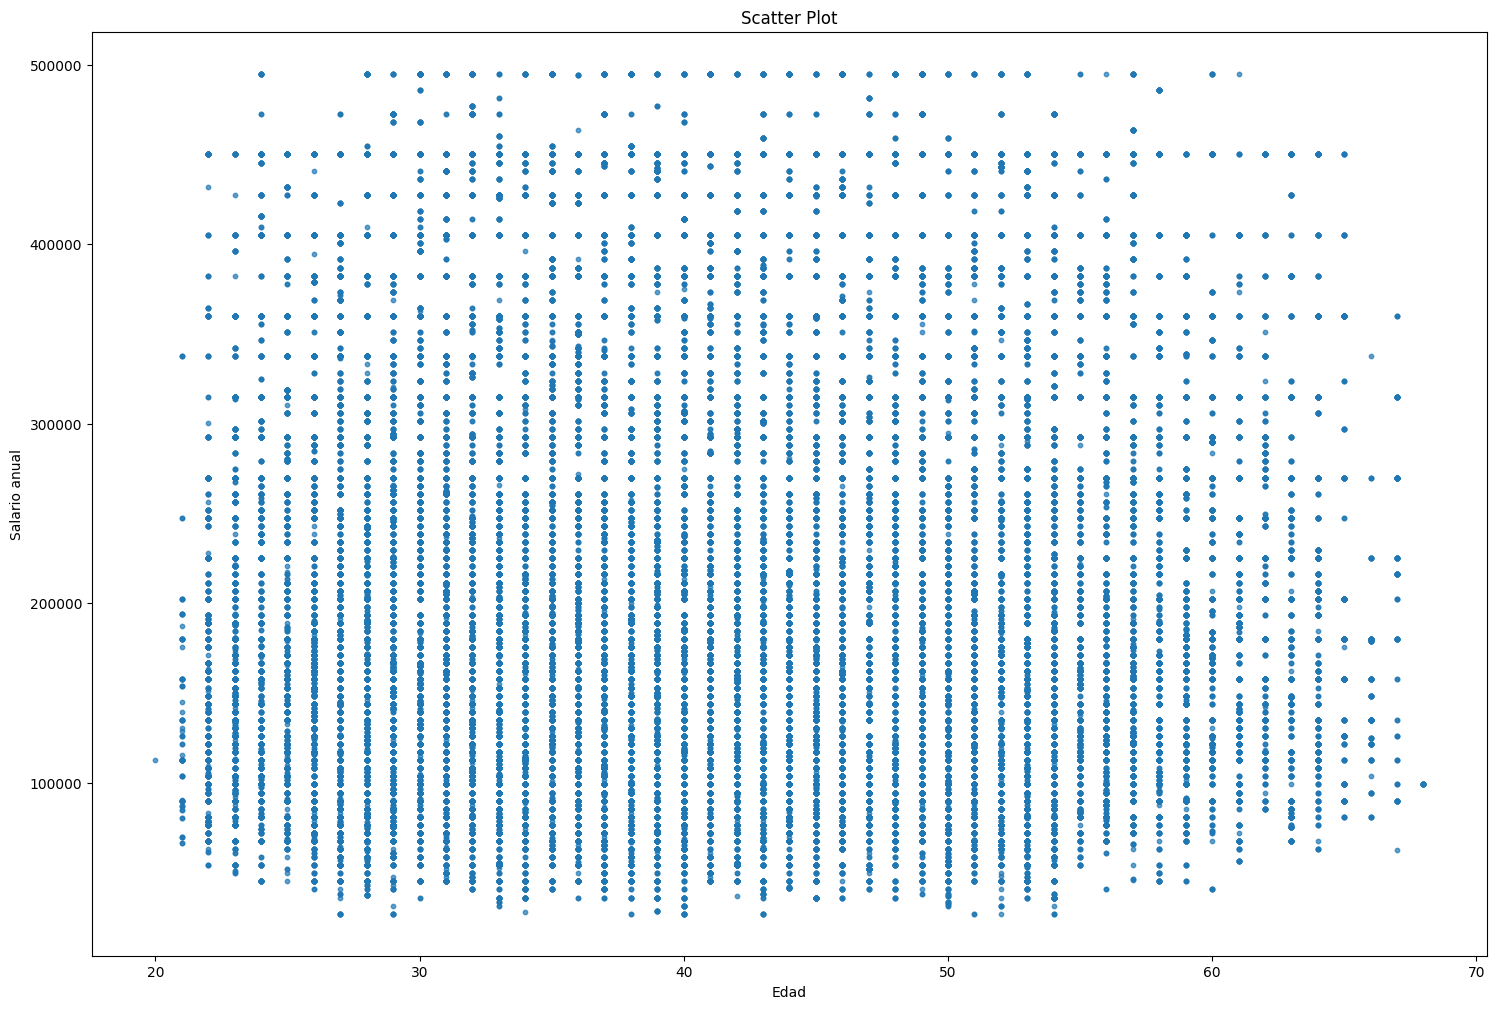

In [ ]:
plt.figure(figsize=(18, 12))
plt.scatter(c_card['YEARS_BIRTH'], c_card['AMT_INCOME_TOTAL'], s=10, alpha=0.7)

plt.xlabel('Edad')
plt.ylabel('Salario anual')
plt.title('Scatter Plot')
plt.show()

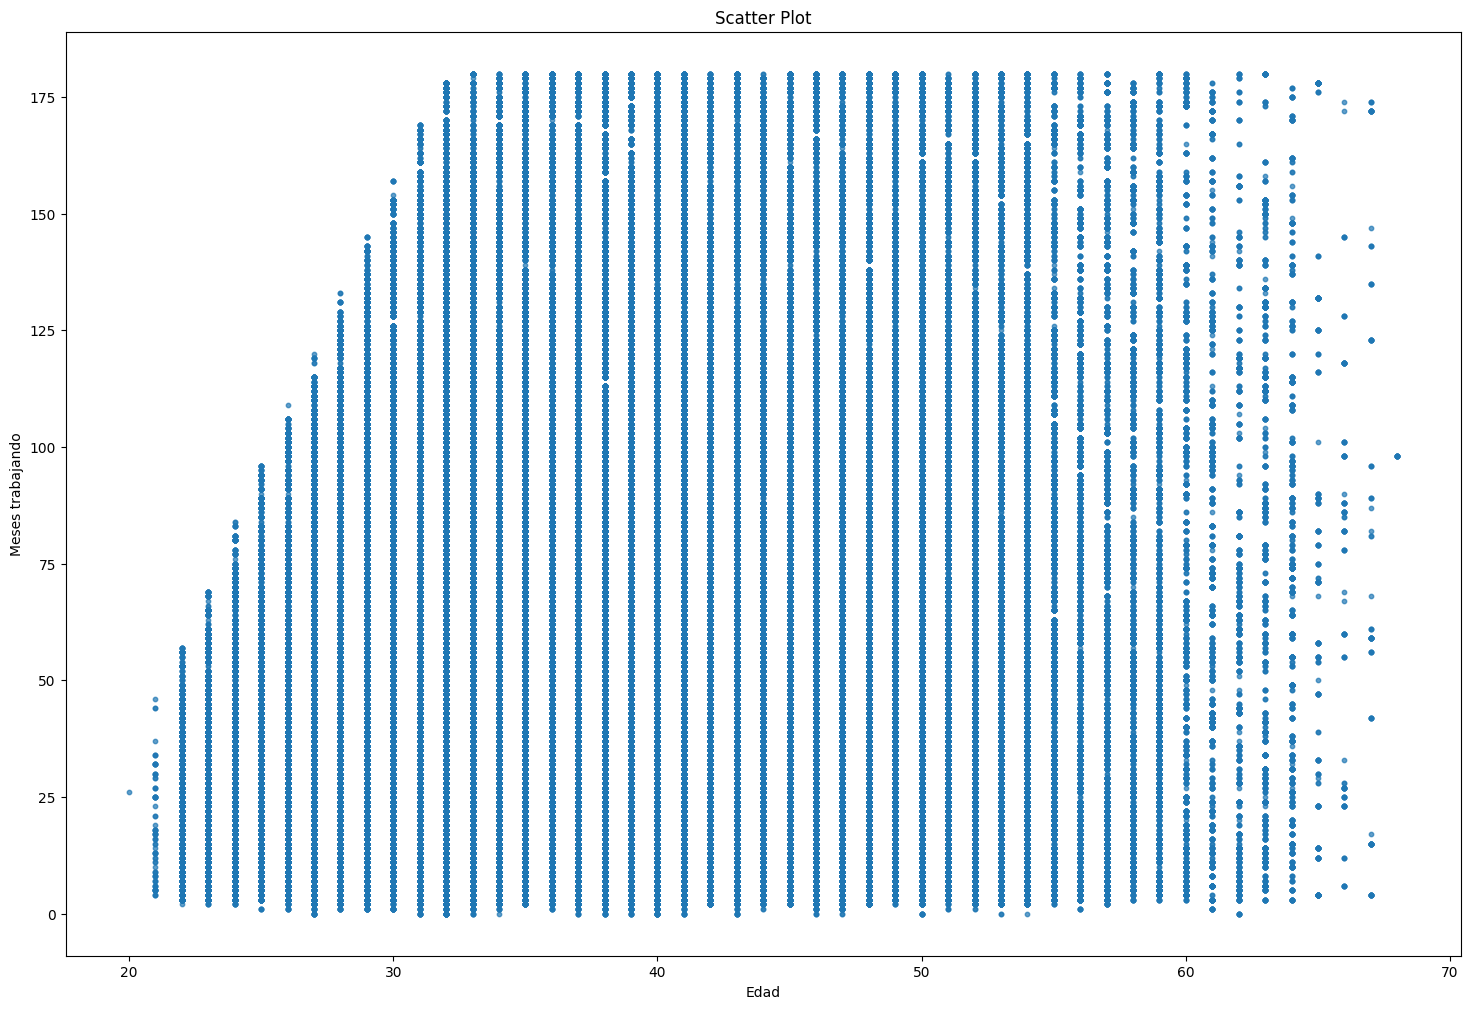

In [ ]:
plt.figure(figsize=(18, 12))
plt.scatter(c_card['YEARS_BIRTH'], c_card['MONTH_EMPLOYED'], s=10, alpha=0.7)

plt.xlabel('Edad')
plt.ylabel('Meses trabajando')
plt.title('Scatter Plot')
plt.show()

# EDA - multivariado

[Text(0.5, 0, 'FLAG_OWN_CAR'),
 Text(1.5, 0, 'FLAG_OWN_REALTY'),
 Text(2.5, 0, 'CNT_CHILDREN'),
 Text(3.5, 0, 'AMT_INCOME_TOTAL'),
 Text(4.5, 0, 'NAME_INCOME_TYPE'),
 Text(5.5, 0, 'NAME_EDUCATION_TYPE'),
 Text(6.5, 0, 'NAME_FAMILY_STATUS'),
 Text(7.5, 0, 'NAME_HOUSING_TYPE'),
 Text(8.5, 0, 'YEARS_BIRTH'),
 Text(9.5, 0, 'MONTH_EMPLOYED'),
 Text(10.5, 0, 'FLAG_MOBIL'),
 Text(11.5, 0, 'FLAG_EMAIL'),
 Text(12.5, 0, 'CNT_FAM_MEMBERS')]

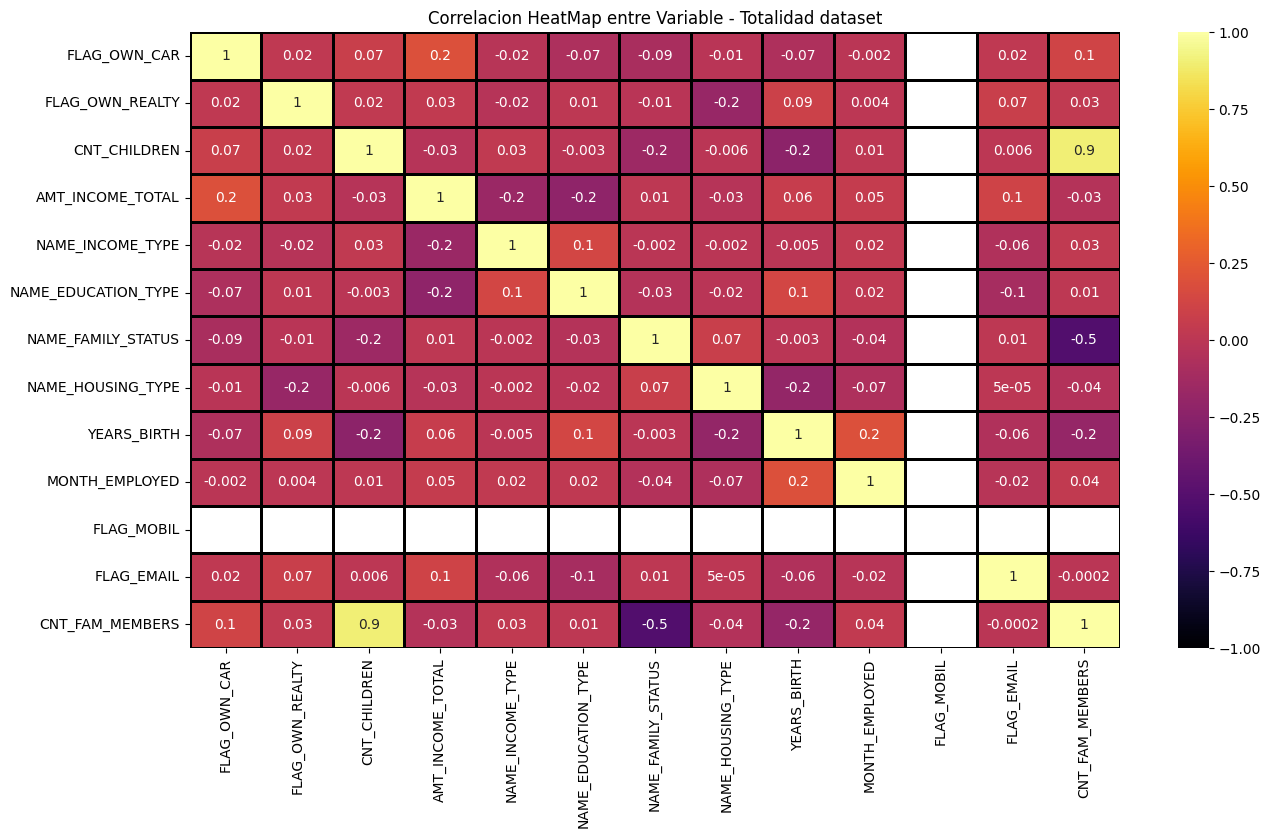

In [ ]:

plt.figure(figsize=(15,8))

heatmap = sns.heatmap(c_card.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1,cmap ='inferno', center=0, linewidths=1, linecolor="Black")
heatmap.set_title("Correlacion HeatMap entre Variable - Totalidad dataset")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

# Nuevo Data Wrangling

**Eliminar registros repetidos**

En este nuevo data wrangling se van a eliminar aquellos registros que se consideran repetidos solo que tienen otro ID. A partir de ello se creara un nuevo dataset.

In [ ]:
# Se crea el nuevo dataset definitivo
c_card_final = c_card.drop_duplicates(keep='first').copy()

In [ ]:
c_card_final.shape

(65864, 13)

**Eliminar columnas del dataset**

In [ ]:
c_card_final = c_card_final.drop("FLAG_MOBIL", axis=1)

En el EDA se observó que todos los clientes tenian celular; por lo tanto es una feature que no le va a agregar poder predictivo al modelo.

**Llevar a escala diferentes features**

In [ ]:
# Llevando a escala diferentes features

# Crear una instancia del escalador min-max
scaler = MinMaxScaler()

# Ajustar y transformar las columnas
c_card_final['MONTH_EMPLOYED'] = scaler.fit_transform(c_card_final[['MONTH_EMPLOYED']])
c_card_final['YEARS_BIRTH'] = scaler.fit_transform(c_card_final[['YEARS_BIRTH']])
c_card_final['AMT_INCOME_TOTAL'] = scaler.fit_transform(c_card_final[['AMT_INCOME_TOTAL']])

# Dataset 2


In [ ]:
credit_record = pd.read_csv("https://raw.githubusercontent.com/LucaForziati/credit_card_approval/main/dataset/credit_record.csv")

In [ ]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
credit_record.shape

(1048575, 3)

In [ ]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


La feature "STATUS" no es del tipo deseado para entrenar al modelo. Posteriormente se trasnformará a tipo int.

In [ ]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


La feature "MONTHS_BALANCE" tiene una media y mediana similares. Eso me lleva a pensar que, a priori, los datos se encuentran distribuidos de forma normal.

**Visualizacion de datos nulos**

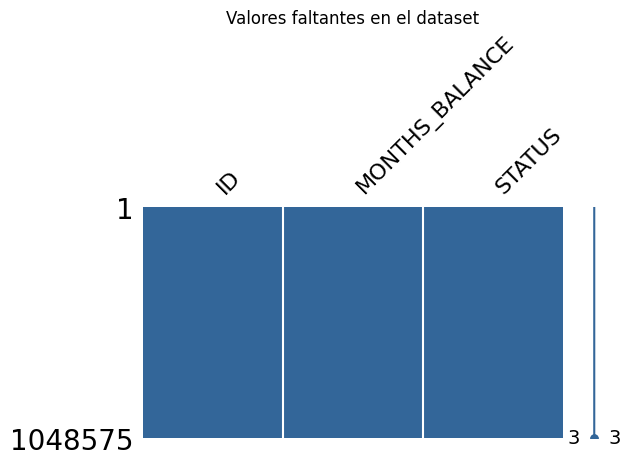

In [ ]:
# Utilizamos missingno para visualizar valores faltantes
matrix_ax = msno.matrix(credit_record, color=(0.2, 0.4, 0.6))
matrix_ax.set_title("Valores faltantes en el dataset")
current_fig = plt.gcf()
current_fig.set_size_inches(6, 3)

El segundo dataset no contiene datos nulos en ninguna de sus features.

**Visualizacion de valores duplicados**

In [ ]:
# Visualizamos si hay datos repetidos utilizando la funcion duplicate
valores_duplicados = credit_record.duplicated()
valores_duplicados.value_counts()

False    1048575
dtype: int64

In [ ]:
# Buscando valores identicos por ID
identico_id = credit_record["ID"]
credit_record[identico_id.isin(identico_id[identico_id.duplicated()])].sort_values("ID")

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
22,5001712,-18,0
...,...,...,...
1048546,5150487,-1,C
1048545,5150487,0,C
1048573,5150487,-28,C
1048558,5150487,-13,C


Encontramos que todos los ID cuentan con al menos 1 repetición en el dataset. Esto era de esperarse ya que, este dataset guarda los datos crediticios de una persona y como se ha comportado a lo largo de los meses.

**Data Wrangling - segundo dataset**

In [ ]:
# Creamos un nuevo dataset a partir del original para conservar la integridad de este ultimo.
credit_r = credit_record.copy() # con el metodo copy creamos una copia del dataset y asi evitamos que futuros cambios afecten al dataset original.

**Convertir ID en indice**

In [ ]:
# Establecer la columna ID como indice.
credit_r.set_index('ID', inplace=True)

**EDA**

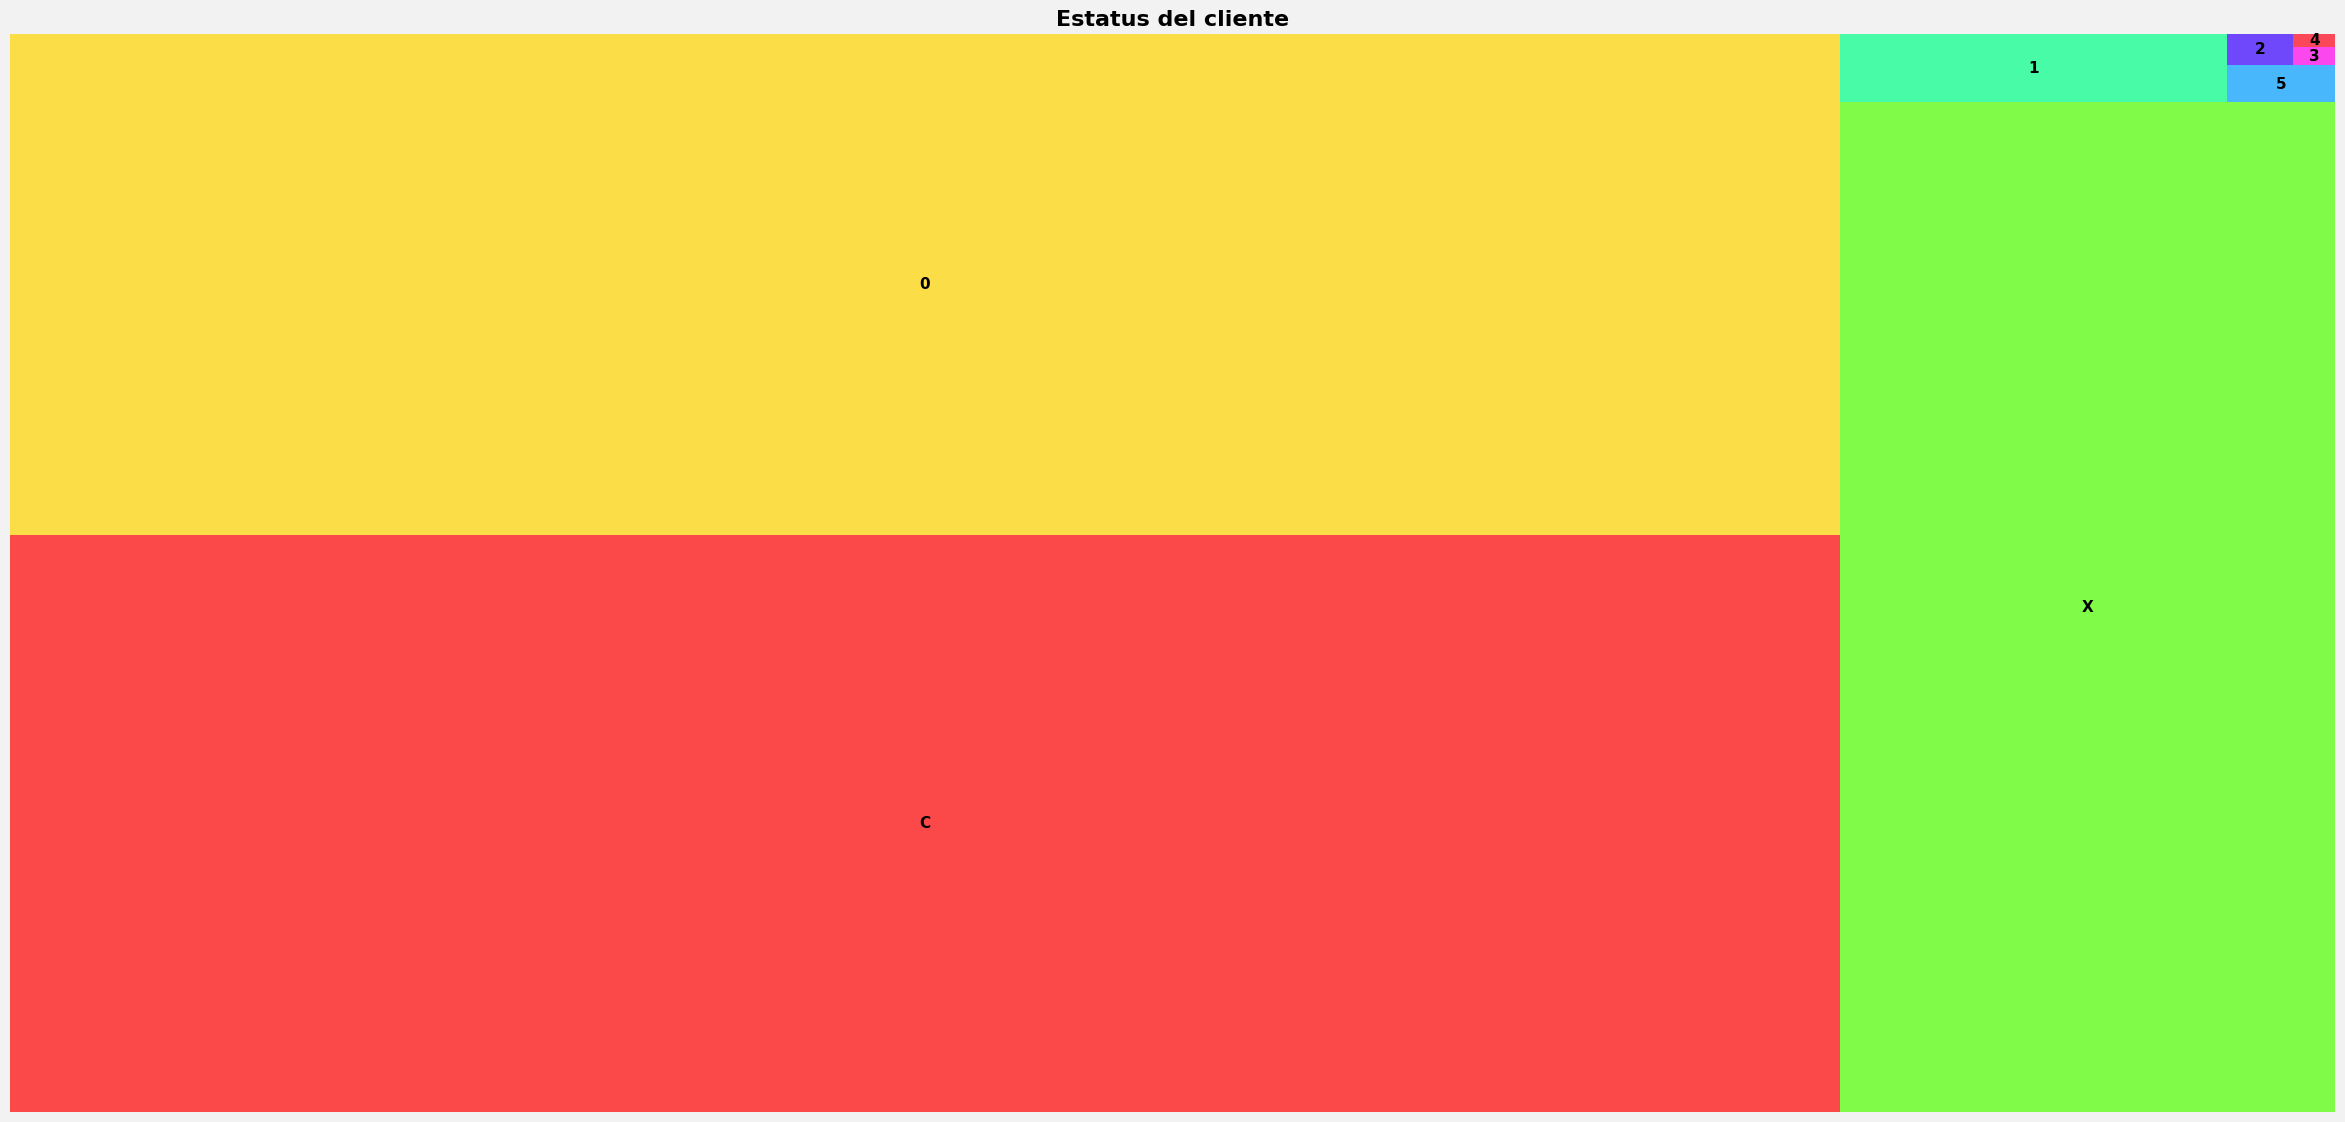

In [ ]:
# Grafico treemapNAME_INCOME_TYPE

conteo_tipo_ingreso = credit_r['STATUS'].value_counts()
lista_tipo_ingreso = list(zip(conteo_tipo_ingreso.index, conteo_tipo_ingreso.values))

# Extraer géneros y conteos por separado
tipo_ingreso = [item[0] for item in lista_tipo_ingreso]
conteos = [item[1] for item in lista_tipo_ingreso]

# colores
hues = np.linspace(0, 1, len(tipo_ingreso))
colors = [plt.cm.hsv(hue) for hue in hues]


# Crear el treemap
plt.figure(figsize=(30, 14), facecolor='#F2F2F2')
plt.title("Estatus del cliente", fontsize=16, fontweight='bold')
plt.axis('off')

squarify.plot(
    sizes=conteos,
    label=tipo_ingreso,
    alpha=0.7,
    color=colors,
    text_kwargs={'fontsize': 11, 'fontweight': 'bold'})

plt.show()


Recordemos el significado de cada STATUS

X = El cliente no pidió credito ese mes.

C = El cliente pagó ese mes.

0 = El cliente pagó el credito con 1-29 dias de retraso.

1 = El cliente pagó el credito con 30-59 dias de retraso.

2 = El cliente pagó el credito con 60-89 dias de retraso.

3 = El cliente pagó el credito con 90-119 dias de retraso.

4 = El cliente pagó el credito con 120-149 dias de retraso.

5 = Se considera una deuda irrecuperable.

En el dataset 2, observamos que la mayoria de los creditos se pagaron a termino, que en muchos meses no se solicitó credito y que una buena parte pagó entre el primer dia y el dia 29 de vencimiento; siendo marginal aquellos casos en donde se pagó luego del dia 30.

A partir de estos datos se debe crear una estrategia para determinar que se considera un buen cliente o un mal cliente; en base a eso se le asignará una categoria para poder analizar casos futuros.

La estrategia va a depender de cada Banco en particular y cual sea su aversion al riesgo.

Creo que es deber realizar un analisis mas exhaustivo y no caracterizar como buen cliente a alguien que es categoria X, C o 1 y como mal cliente al resto de categorias.

Actualmente, la forma que tenemos de visualizar el presente dataset 2 es poco intuitiva y no brinda claridad en como se podria aplicar un criterio de clasificacion. Para ello, tomaré la idea del usuario de Kaggle KIROLOS ATEF en su trabajo sobre el presente dataset.

In [ ]:
credit_r_expandido = pd.get_dummies(data=credit_r,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(credit_r['STATUS'].unique().tolist())].sum()
credit_r_expandido = credit_r_expandido.rename(columns=
                      {'0':'pagadoEn_1_29',
                       '1':'pagadoEn_30_59',
                       '2':'pagadoEn_60_89',
                       '3':'pagadoEn_90_119',
                       '4':'pagadoEn_120_149',
                       '5':'No_pagado',
                       'C':'Pagado_en_termino',
                       'X':'No_credito',
                      })

overall_pastdue=['pagadoEn_1_29','pagadoEn_30_59',	'pagadoEn_60_89',	'pagadoEn_90_119'	,'pagadoEn_120_149',	'No_pagado']
credit_r_expandido['Numero_meses'] = credit_r.groupby('ID')['MONTHS_BALANCE'].count()
credit_r_expandido['mas_60_dias']=credit_r_expandido[["pagadoEn_60_89",'pagadoEn_90_119'	,'pagadoEn_120_149'	,'No_pagado']].sum(axis=1)
credit_r_expandido['menos_59_dias']=credit_r_expandido[['pagadoEn_1_29','pagadoEn_30_59',]].sum(axis=1)
credit_r_expandido['numero_atrasos'] = credit_r_expandido[overall_pastdue].sum(axis=1)
credit_r_expandido['meses_fuera_termino'] = credit_r_expandido['Pagado_en_termino']- credit_r_expandido['numero_atrasos']
credit_r_expandido.head()

,pagadoEn_1_29,pagadoEn_30_59,pagadoEn_60_89,pagadoEn_90_119,pagadoEn_120_149,No_pagado,Pagado_en_termino,No_credito,Numero_meses,mas_60_dias,menos_59_dias,numero_atrasos,meses_fuera_termino
ID,,,,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4,0,3,3,-3
5001712,10,0,0,0,0,0,9,0,19,0,10,10,-1
5001713,0,0,0,0,0,0,0,22,22,0,0,0,0
5001714,0,0,0,0,0,0,0,15,15,0,0,0,0
5001715,0,0,0,0,0,0,0,60,60,0,0,0,0


In [ ]:
credit_r_datos = credit_r_expandido.copy()
credit_r_datos['pagado_entre_1-59'] = credit_r_expandido[['pagadoEn_1_29','pagadoEn_30_59']].sum(axis=1)
credit_r_datos['pagado_entre_60-150'] = credit_r_expandido[["pagadoEn_60_89",'pagadoEn_90_119'	,'pagadoEn_120_149']].sum(axis=1)
columnas_eliminar = ('pagadoEn_1_29','pagadoEn_30_59', "pagadoEn_60_89",'pagadoEn_90_119'	,'pagadoEn_120_149', 'mas_60_dias', 'menos_59_dias')
for i in columnas_eliminar:
  credit_r_datos = credit_r_datos.drop(i, axis=1)
credit_r_datos

,No_pagado,Pagado_en_termino,No_credito,Numero_meses,numero_atrasos,meses_fuera_termino,pagado_entre_1-59,pagado_entre_60-150
ID,,,,,,,,
5001711,0,0,1,4,3,-3,3,0
5001712,0,9,0,19,10,-1,10,0
5001713,0,0,22,22,0,0,0,0
5001714,0,0,15,15,0,0,0,0
5001715,0,0,60,60,0,0,0,0
...,...,...,...,...,...,...,...,...
5150482,0,6,0,18,12,-6,12,0
5150483,0,0,18,18,0,0,0,0
5150484,0,1,0,13,12,-11,12,0


In [ ]:
# Criterio para asignarle a un cliente historia crediticio y si es conveniente darle un servicio de tarjeta de credito
# 1 -> potencial cliente
# 0 -> descartado como potencial cliente
target=[]
for index,row in credit_r_datos.iterrows() :
  # Se le asignara el valor de 1 al cliente que no haya solicitado un credito y ese valor sea igual a la cantidad de meses que se encuetra dentro de la institucion
  # Esto puede dar lugar a dos circunstancias.
      # 1) Es un cliente nuevo, por lo tanto "No_credito" == 0 y "Numero_meses" == 0
      # 2) Sea un cliente que cuenta con varios meses dentro de la institucion y nunca haya solicitado un credito.
  if row['No_credito'] == row['Numero_meses']:
    target.append(1)
  # Se le asignará 1 al cliente que siempre haya cumplido con sus compromisos.
  elif row['Pagado_en_termino'] > 0 and abs(row['meses_fuera_termino']) == 0:
    target.append(1)
  # Se le asignará 1 a aquellos clientes que las veces que hayan pagado en termino supere al numero de veces que hayan caido en mora,
  # habiendo cancelado la deuda entre el dia 1 y el 59. Ademas, si la mora es mayor a 60 dias no se asignara ese valor.
  elif (row['Pagado_en_termino'] > row['pagado_entre_1-59']) and row['pagado_entre_60-150'] == 0:
    target.append(1)
  # Se le asignara 1 a aquellos clientes en donde coincidan el valor de cancelar la deuda entre 1-59 dias con los meses incumplidos
  # y que ese incumplimiento represente menos del 50% de los meses en los cuales está en la institucion.
  elif (row['pagado_entre_1-59'] == abs(row['meses_fuera_termino'])) and  (row['pagado_entre_1-59']*100/row['Numero_meses'] < 50 ):
    target.append(1)
  # Se le asignara 1 a aquellos clientes en donde el numero de meses incumplidos no supere el 20% de los meses totales y que hayan cancelado una deuda
  # entre 60-150 dias, siempre y tanto estos casos no superen el 20%
  elif (abs(row['meses_fuera_termino'])*100/row['Numero_meses'] < 20 ) and (row['pagado_entre_60-150']*100/row['Numero_meses'] < 20 ):
    target.append(1)
  # Todos los demas casos se los considerará como 0
  else:
    target.append(0)

credit_r_datos['aprobacion']=target
credit_r_datos['aprobacion'].value_counts()

1    26048
0    19937
Name: aprobacion, dtype: int64

# Nuevo dataset unido

In [ ]:
c_aprobacion_original = c_card_final.merge(credit_r_datos, left_index=True, right_index=True, how='inner')

In [ ]:
# Llevando a escala diferentes features

# Crear una instancia del escalador min-max
scaler = MinMaxScaler()

columnas_a_transformar = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                          'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS', 'No_pagado',
                          'Pagado_en_termino', 'No_credito', 'Numero_meses', 'numero_atrasos', 'meses_fuera_termino',
                          'pagado_entre_1-59', 'pagado_entre_60-150']
# Ajustar y transformar las columnas
for i in columnas_a_transformar:
  c_aprobacion_original[i] = scaler.fit_transform(c_aprobacion_original[[i]])

Ya que de forma agrede se han dejado ciertos outliers en el dataset, se considera como mejor opción para escalar los datos a valores entre 0 y 1, usar MinMaxScaler() sobre StandardScaler(). Esto porque este ultimo estandariza los datos para tener una media de 0 y una desviación estándar de 1. Esto puede ser problemático con los valores atípicos porque pueden distorsionar la media y la desviación estándar de los datos.

[Text(0.5, 0, 'FLAG_OWN_CAR'),
 Text(1.5, 0, 'FLAG_OWN_REALTY'),
 Text(2.5, 0, 'CNT_CHILDREN'),
 Text(3.5, 0, 'AMT_INCOME_TOTAL'),
 Text(4.5, 0, 'NAME_INCOME_TYPE'),
 Text(5.5, 0, 'NAME_EDUCATION_TYPE'),
 Text(6.5, 0, 'NAME_FAMILY_STATUS'),
 Text(7.5, 0, 'NAME_HOUSING_TYPE'),
 Text(8.5, 0, 'YEARS_BIRTH'),
 Text(9.5, 0, 'MONTH_EMPLOYED'),
 Text(10.5, 0, 'FLAG_EMAIL'),
 Text(11.5, 0, 'CNT_FAM_MEMBERS'),
 Text(12.5, 0, 'No_pagado'),
 Text(13.5, 0, 'Pagado_en_termino'),
 Text(14.5, 0, 'No_credito'),
 Text(15.5, 0, 'Numero_meses'),
 Text(16.5, 0, 'numero_atrasos'),
 Text(17.5, 0, 'meses_fuera_termino'),
 Text(18.5, 0, 'pagado_entre_1-59'),
 Text(19.5, 0, 'pagado_entre_60-150'),
 Text(20.5, 0, 'aprobacion')]

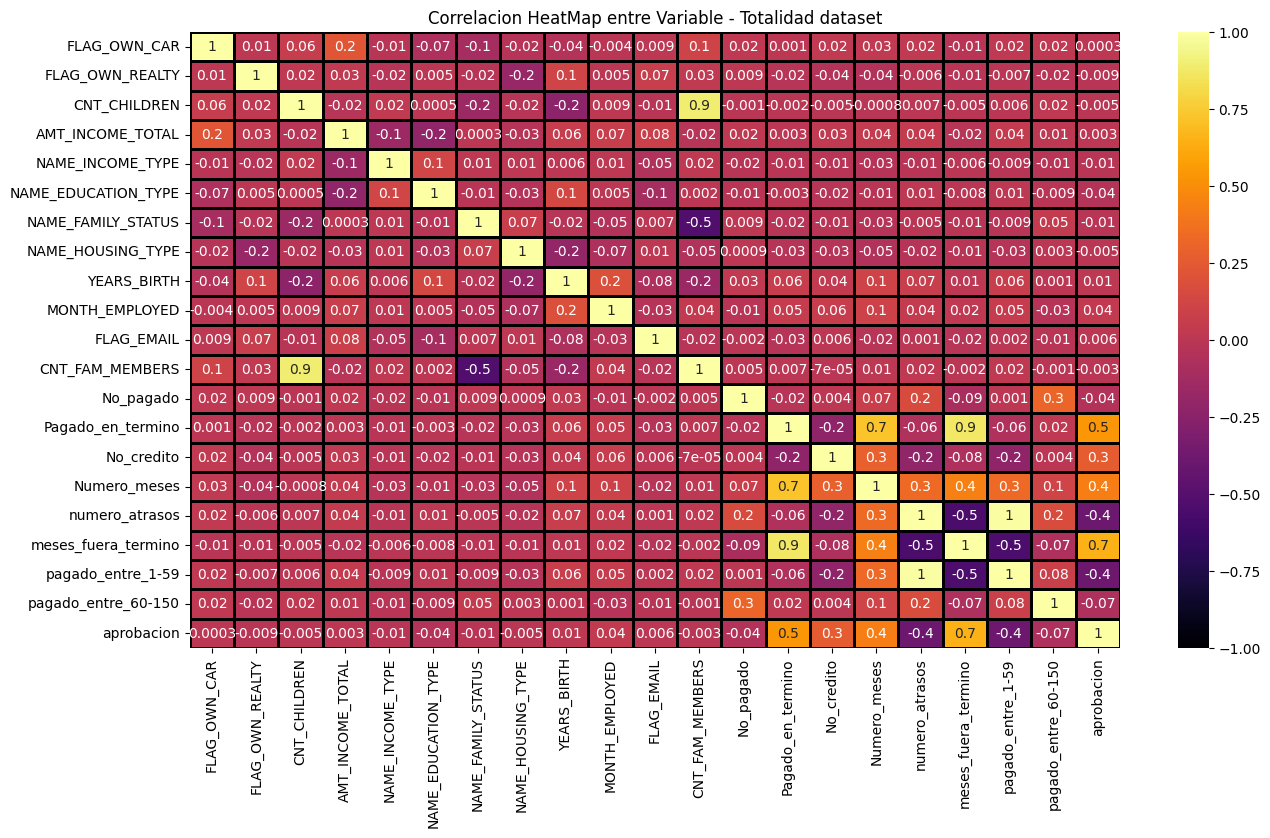

In [ ]:
# Grafico de correlación entre las features
plt.figure(figsize=(15,8))

heatmap = sns.heatmap(c_aprobacion_original.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1,cmap ='inferno', center=0, linewidths=1, linecolor="Black")
heatmap.set_title("Correlacion HeatMap entre Variable - Totalidad dataset")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

Observamos la correlacion perfecta entre "pagado_entre_1_59" y "numero_atrasos". Por lo tanto, se decide eliminar del dataset "numero_atrasos".

La feature "CNT_CHILDREN" y "CNT_FAN_MEMBERS" tienen una correlacion superior al 90%. Por lo tanto, se procedera a eliminar "CNT_CHILDREN" del dataset.

Otra fuerte correlacion se puede visualizar entre las features "meses_fuera_termino" y "pagado_en_termino". Se procede a eliminar "pagado_en_termino".

In [ ]:
c_aprobacion_original = c_aprobacion_original.drop("numero_atrasos", axis=1)
c_aprobacion_original = c_aprobacion_original.drop("CNT_CHILDREN", axis=1)
c_aprobacion_original = c_aprobacion_original.drop("Pagado_en_termino", axis=1)

In [ ]:
c_aprobacion_original.shape

(7055, 18)

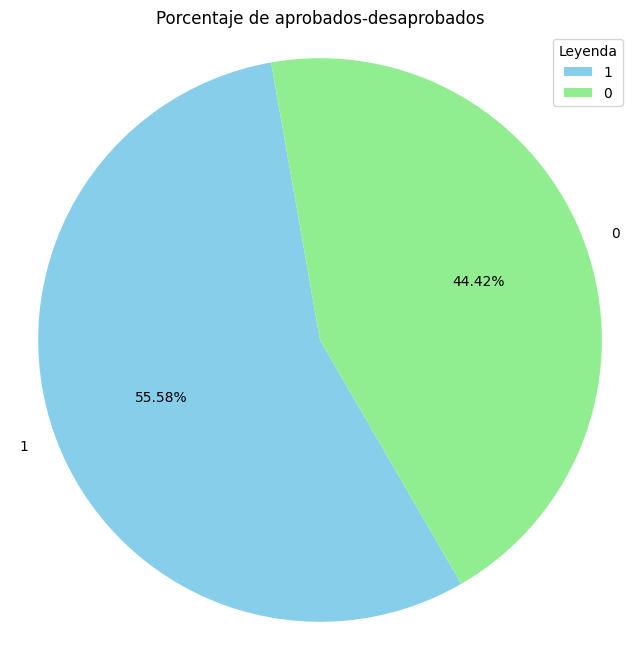

In [ ]:
# Graficamos como quedo la composicion entre aprobaods y desaprobados
composicion1_0 = c_aprobacion_original["aprobacion"].value_counts()
etiquetas_composicion = c_aprobacion_original["aprobacion"].value_counts().index
plt.figure(figsize=(8, 8))
plt.pie(composicion1_0, labels=etiquetas_composicion, autopct='%1.2f%%', startangle=100, colors = colores)
plt.title('Porcentaje de aprobados-desaprobados')
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.legend(title='Leyenda', loc='upper right', labels=etiquetas_composicion)
plt.show()

# Separar dataset

**Crear una copia del dataset**

In [ ]:
# Se crea una copia del dataset final.

c_aprobacion = c_aprobacion_original.copy()

**Separar al dataset en train y test**

In [ ]:
#Separación en Train y Test
X = c_aprobacion.drop("aprobacion", axis=1) # Almacenamos en la variable X el dataset sin la feature categorica
y = c_aprobacion['aprobacion'] # Almacenamos en la variable y la feature categorica

In [ ]:
from sklearn.model_selection import train_test_split
# Separamos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Clasificación

# SN1

# SN1 - Modelos

**Diccionario para almacenar las metricas de los modelos**

In [ ]:
# Metricas obtenidas por los modelos
metricas_sn1 = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
}

**DecisionTreeClassifier**

In [ ]:
# Declaramos al modelo
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42) # Arbol de decision con hiperparametros aleatorios para comprobar resultados en una primera pasada
arbol_de_decision.fit(X_train, y_train) # entrenar al modelo
y_pred_tree_sn1 = arbol_de_decision.predict(X_test) # predicciones obtenidas

In [ ]:
# Almacenamos en el diccionario de metricas los resultados del modelo
# Declaramos una condicion que si el valor del accuracy ya está en la lista, no se agregue los resultados al diccionario
# esto para evitar que, eventualmente, se puedan agregar el mismo resultado mas de una vez y rompa el analisis final
if accuracy_score(y_test, y_pred_tree_sn1) not in metricas_sn1['accuracy']:
  # accuracy
  metricas_sn1['accuracy'].append(accuracy_score(y_test, y_pred_tree_sn1))
  # precision
  metricas_sn1['precision'].append(precision_score(y_test, y_pred_tree_sn1))
  # recall
  metricas_sn1['recall'].append(recall_score(y_test, y_pred_tree_sn1))
  # f1
  metricas_sn1['f1'].append(f1_score(y_test, y_pred_tree_sn1))

In [ ]:
# Metricas del arbol de decisión
print("Metricas arbol de decision")
print("---------------------")
print(f'Accuracy: {metricas_sn1["accuracy"][0]}')
print(f'Precision: {metricas_sn1["precision"][0]}')
print(f'Recall: {metricas_sn1["recall"][0]}')
print(f'F1: {metricas_sn1["f1"][0]}')

Metricas arbol de decision
---------------------
Accuracy: 0.9650448748228625
Precision: 0.9888412017167382
Recall: 0.9497114591920858
F1: 0.9688814129520605


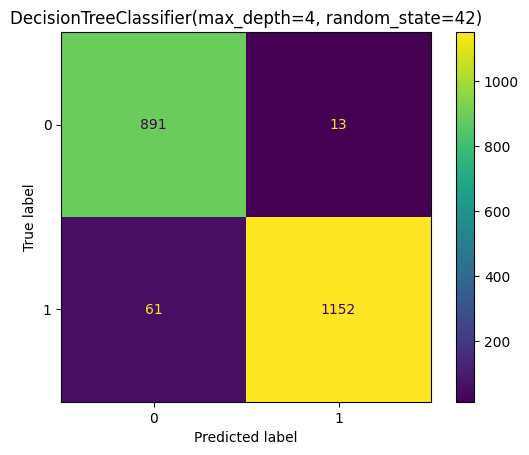

In [ ]:
# Matriz de confusion
cm_tree = confusion_matrix(y_test, y_pred_tree_sn1,labels=arbol_de_decision.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=arbol_de_decision.classes_)
disp_tree.plot()
disp_tree.ax_.set_title(arbol_de_decision)
plt.show()

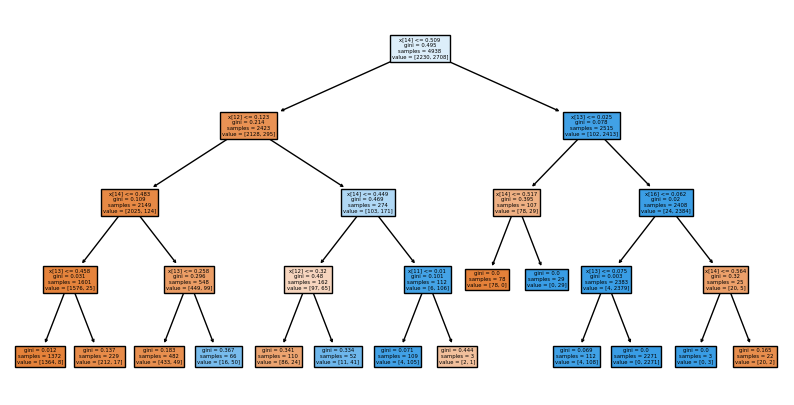

In [ ]:
# Grafico del arbol de decision
plt.figure(figsize=(10, 5))  # Ajusta el tamaño deseado (ancho, alto)
tree.plot_tree(arbol_de_decision, filled=True)  # 'filled=True' para colorear los nodos
plt.show()

In [ ]:
"""
# Medimos bias-variance tradeoff para corroborar
otro, bias, variance = bias_variance_decomp(arbol_de_decision, X_train.values, y_train.values, X_test.values, y_test.values,
                                           random_seed=42)
print("Average Bias : ", bias)
print("Average Variance : ", variance)
"""

'\n# Medimos bias-variance tradeoff para corroborar\notro, bias, variance = bias_variance_decomp(arbol_de_decision, X_train.values, y_train.values, X_test.values, y_test.values,\n                                           random_seed=42)\nprint("Average Bias : ", bias)\nprint("Average Variance : ", variance)\n'

Average Bias :  0.0269248937175248

Average Variance :  0.024645725082664147

**Random forest**

In [ ]:
# Declaramos el modelo
random_forest = RandomForestClassifier(max_depth=4, random_state=42)
random_forest.fit(X_train, y_train) # entrenar al modelo
y_pred_random_sn1 = random_forest.predict(X_test) # predicciones obtenidas

In [ ]:
# Almacenamos en el diccionario de metricas los resultados del modelo
# Declaramos una condicion que si el valor del accuracy ya está en la lista, no se agregue los resultados al diccionario
# esto para evitar que, eventualmente, se puedan agregar el mismo resultado mas de una vez y rompa el analisis final
if (accuracy_score(y_test, y_pred_random_sn1) not in metricas_sn1['accuracy']) or (precision_score(y_test, y_pred_random_sn1) not in metricas_sn1['precision']):
  # accuracy
  metricas_sn1['accuracy'].append(accuracy_score(y_test, y_pred_random_sn1))
  # precision
  metricas_sn1['precision'].append(precision_score(y_test, y_pred_random_sn1))
  # recall
  metricas_sn1['recall'].append(recall_score(y_test, y_pred_random_sn1))
  # f1
  metricas_sn1['f1'].append(f1_score(y_test, y_pred_random_sn1))


In [ ]:
# Metricas del random forest
print("Metricas random forest")
print("---------------------")
print(f'Accuracy: {metricas_sn1["accuracy"][1]}')
print(f'Precision: {metricas_sn1["precision"][1]}')
print(f'Recall: {metricas_sn1["recall"][1]}')
print(f'F1: {metricas_sn1["f1"][1]}')

Metricas random forest
---------------------
Accuracy: 0.9650448748228625
Precision: 0.9855072463768116
Recall: 0.9530090684253916
F1: 0.9689857502095557


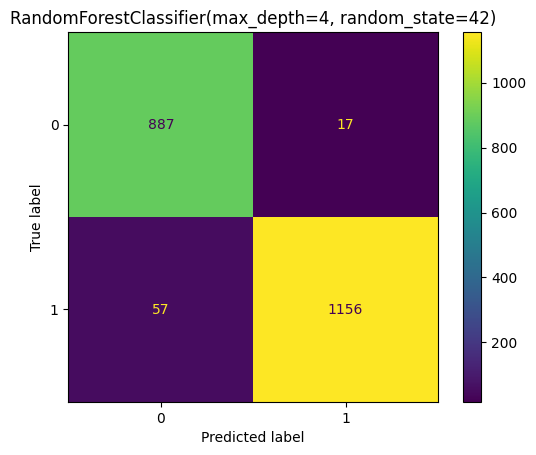

In [ ]:
# Matriz de confusion
cm_random = confusion_matrix(y_test, y_pred_random_sn1,labels=random_forest.classes_)
disp_random = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=random_forest.classes_)
disp_random.plot()
disp_random.ax_.set_title(random_forest)
plt.show()

In [ ]:
"""
# tiempo de ejecucón 90 seg aprox
# Medimos bias-variance tradeoff para corroborar
otro, bias, variance = bias_variance_decomp(random_forest, X_train.values, y_train.values, X_test.values, y_test.values,
                                           random_seed=42)
print("Average Bias : ", bias)
print("Average Variance : ", variance)
"""

'\n# tiempo de ejecucón 90 seg aprox\n# Medimos bias-variance tradeoff para corroborar\notro, bias, variance = bias_variance_decomp(random_forest, X_train.values, y_train.values, X_test.values, y_test.values,\n                                           random_seed=42)\nprint("Average Bias : ", bias)\nprint("Average Variance : ", variance)\n'

Average Bias :  0.03731695795937648

Average Variance :  0.00916154936230515

**KNeighborsClassifier**

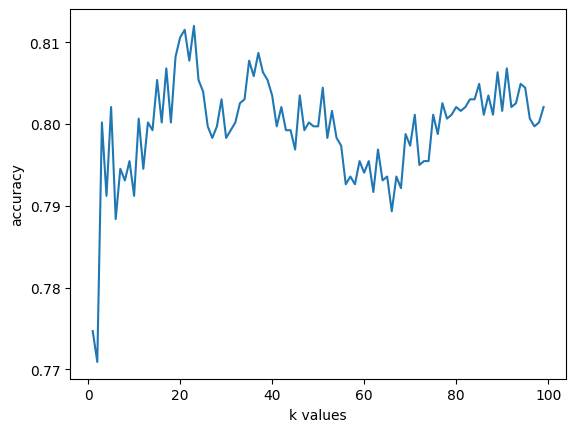

In [ ]:
# Numero optimo de vecinos

score_list=[]

for each in range(1,100):
    knn2 = KNeighborsClassifier(n_neighbors= each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))

plt.plot(range(1,100),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [ ]:
max_value = max(score_list)
max_index = score_list.index(max_value)
optimum = max_index + 1
print(optimum)
# the reason of +1 is that arrays index start at 0 but for range start at 1

23


In [ ]:
# Vecinos mas cercanos
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train) # entrenar al modelo
y_pred_knn_sn1 = knn.predict(X_test) # predicciones obtenidas

In [ ]:
# Almacenamos en el diccionario de metricas los resultados del modelo
# Declaramos una condicion que si el valor del accuracy ya está en la lista, no se agregue los resultados al diccionario
# esto para evitar que, eventualmente, se puedan agregar el mismo resultado mas de una vez y rompa el analisis final
if accuracy_score(y_test, y_pred_knn_sn1) not in metricas_sn1['accuracy']:
  # accuracy
  metricas_sn1['accuracy'].append(accuracy_score(y_test, y_pred_knn_sn1))
  # precision
  metricas_sn1['precision'].append(precision_score(y_test, y_pred_knn_sn1))
  # recall
  metricas_sn1['recall'].append(recall_score(y_test, y_pred_knn_sn1))
  # f1
  metricas_sn1['f1'].append(f1_score(y_test, y_pred_knn_sn1))

In [ ]:
# Metricas del knn
print("Metricas knn")
print("---------------------")
print(f'Accuracy: {metricas_sn1["accuracy"][2]}')
print(f'Precision: {metricas_sn1["precision"][2]}')
print(f'Recall: {metricas_sn1["recall"][2]}')
print(f'F1: {metricas_sn1["f1"][2]}')

Metricas knn
---------------------
Accuracy: 0.8119981105337742
Precision: 0.8735105407882676
Recall: 0.7856553998351196
F1: 0.8272569444444444


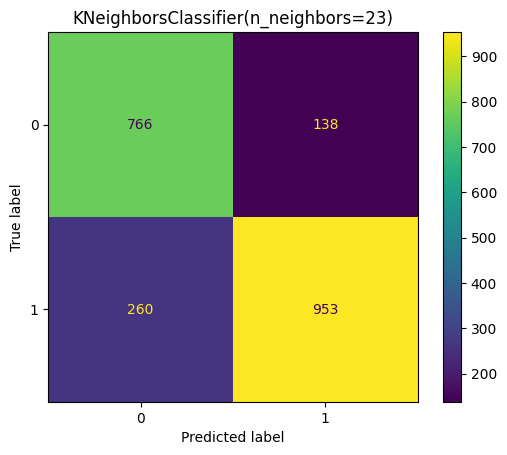

In [ ]:
# Matriz de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn_sn1,labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot()
disp_knn.ax_.set_title(knn)
plt.show()

In [ ]:
"""
# Medimos bias-variance tradeoff para corroborar
otro, bias, variance = bias_variance_decomp(knn, X_train.values, y_train.values, X_test.values, y_test.values,
                                           random_seed=42)
print("Average Bias : ", bias)
print("Average Variance : ", variance)
"""

'\n# Medimos bias-variance tradeoff para corroborar\notro, bias, variance = bias_variance_decomp(knn, X_train.values, y_train.values, X_test.values, y_test.values,\n                                           random_seed=42)\nprint("Average Bias : ", bias)\nprint("Average Variance : ", variance)\n'


Average Bias :  0.19083608880491262

Average Variance :  0.12007794048181387

**LogisticRegression**

In [ ]:
# Regresión logistica
regresion_logistica = LogisticRegression()
regresion_logistica.fit(X_train, y_train) # entrenar al modelo
y_pred_regresion_sn1 = regresion_logistica.predict(X_test) # predicciones obtenidas

In [ ]:
# Almacenamos en el diccionario de metricas los resultados del modelo
# Declaramos una condicion que si el valor del accuracy ya está en la lista, no se agregue los resultados al diccionario
# esto para evitar que, eventualmente, se puedan agregar el mismo resultado mas de una vez y rompa el analisis final
if accuracy_score(y_test, y_pred_regresion_sn1) not in metricas_sn1['accuracy']:
  # accuracy
  metricas_sn1['accuracy'].append(accuracy_score(y_test, y_pred_regresion_sn1))
  # precision
  metricas_sn1['precision'].append(precision_score(y_test, y_pred_regresion_sn1))
  # recall
  metricas_sn1['recall'].append(recall_score(y_test, y_pred_regresion_sn1))
  # f1
  metricas_sn1['f1'].append(f1_score(y_test, y_pred_regresion_sn1))

In [ ]:
# Metricas regresion logistica
print("Metricas regresion logistica")
print("---------------------")
print(f'Accuracy: {metricas_sn1["accuracy"][3]}')
print(f'Precision: {metricas_sn1["precision"][3]}')
print(f'Recall: {metricas_sn1["recall"][3]}')
print(f'F1: {metricas_sn1["f1"][3]}')

Metricas regresion logistica
---------------------
Accuracy: 0.9480396787907416
Precision: 0.9833479404031551
Recall: 0.9249793899422918
F1: 0.9532710280373832


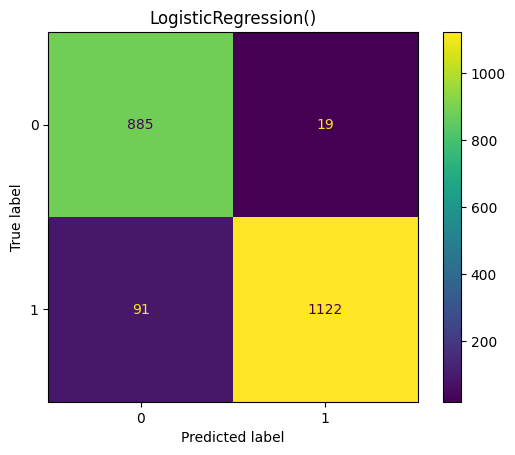

In [ ]:
# Matriz de confusion
cm_regresion = confusion_matrix(y_test, y_pred_regresion_sn1,labels=regresion_logistica.classes_)
disp_regresion = ConfusionMatrixDisplay(confusion_matrix=cm_regresion, display_labels=regresion_logistica.classes_)
disp_regresion.plot()
disp_regresion.ax_.set_title(regresion_logistica)
plt.show()

In [ ]:
"""
# Medimos bias-variance tradeoff para corroborar
otro, bias, variance = bias_variance_decomp(regresion_logistica, X_train.values, y_train.values, X_test.values, y_test.values,
                                           random_seed=42)
print("Average Bias : ", bias)
print("Average Variance : ", variance)
"""

'\n# Medimos bias-variance tradeoff para corroborar\notro, bias, variance = bias_variance_decomp(regresion_logistica, X_train.values, y_train.values, X_test.values, y_test.values,\n                                           random_seed=42)\nprint("Average Bias : ", bias)\nprint("Average Variance : ", variance)\n'

Average Bias :  0.052432687765706185

Average Variance :  0.009456778460085026

**SVC**

In [ ]:
# Super vector machine
svc = SVC(C=0.1,kernel='rbf',random_state=42)
svc.fit(X_train, y_train) # entrenar al modelo
y_pred_svc_sn1 = svc.predict(X_test) # predicciones obtenidas

In [ ]:
# Almacenamos en el diccionario de metricas los resultados del modelo
# Declaramos una condicion que si el valor del accuracy ya está en la lista, no se agregue los resultados al diccionario
# esto para evitar que, eventualmente, se puedan agregar el mismo resultado mas de una vez y rompa el analisis final
if accuracy_score(y_test, y_pred_svc_sn1) not in metricas_sn1['accuracy']:
  # accuracy
  metricas_sn1['accuracy'].append(accuracy_score(y_test, y_pred_svc_sn1))
  # precision
  metricas_sn1['precision'].append(precision_score(y_test, y_pred_svc_sn1))
  # recall
  metricas_sn1['recall'].append(recall_score(y_test, y_pred_svc_sn1))
  # f1
  metricas_sn1['f1'].append(f1_score(y_test, y_pred_svc_sn1))

In [ ]:
# Metricas del svc
print("Metricas svc")
print("---------------------")
print(f'Accuracy: {metricas_sn1["accuracy"][4]}')
print(f'Precision: {metricas_sn1["precision"][4]}')
print(f'Recall: {metricas_sn1["recall"][4]}')
print(f'F1: {metricas_sn1["f1"][4]}')

Metricas svc
---------------------
Accuracy: 0.8729333963155409
Precision: 0.9710578842315369
Recall: 0.8021434460016488
F1: 0.8785553047404063


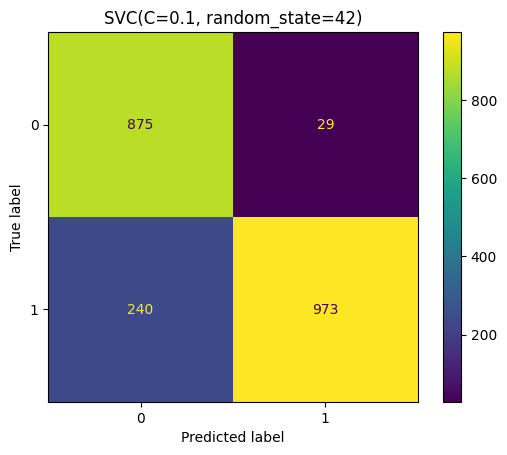

In [ ]:
# Matriz de confusion
cm_scv = confusion_matrix(y_test, y_pred_svc_sn1,labels=svc.classes_)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_scv, display_labels=svc.classes_)
disp_svc.plot()
disp_svc.ax_.set_title(svc)
plt.show()

**Conclusión y metricas de SN1**

In [ ]:
# guardar en un dataset las metricas de los diferentes modelos
df_metricas_sn1 = pd.DataFrame(metricas_sn1)

# obtener el nombre de cada modelo y establecerlo como indice
models = [arbol_de_decision, random_forest, knn, regresion_logistica, svc] # guardamos los modelos en un array para extraer su nombre
nombre_modelos = [model.__class__.__name__ for model in models]
df_metricas_sn1.index = nombre_modelos
# dar vuelta el dataset
df_metricas_sn1 = df_metricas_sn1.transpose()

Se puede observar que los modelos, en general, obtuvieron buenos resultados.

Que algunos valores esten tan cercanos a 1 es una cuestion que me preocupa y quiero encontrar su causa.

In [ ]:
grafico_metricas(df_metricas_sn1)

# SN1 - Cross-validation

Con la finalidad de obtener mayor información sobre el desempeño de los modelos se realiza un cross_validation.

En este caso, a diferencia de lo realizado en la parte "modelos", se declararan todos los modelos a utilizar y se los almacenará en un array para luego recorrerlos. Con esto se busca reducir el tamaño de la presente notebook.

In [ ]:
# Declaracion de los diferentes modelos ya utilizados con los mismos hiperparametros

# Arbol de decision
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42)
# Random Forest
random_forest = RandomForestClassifier(max_depth=4, random_state=42)
# Vecinos mas cercanos
knn = KNeighborsClassifier(n_neighbors=23)
# Regresion logistica
regresion_logistica = LogisticRegression()
# Super vector machine
svc = SVC(C=0.1,kernel='rbf',random_state=42)

# Se almacena en una lista para despues poder recorrerlos con un for
models = [arbol_de_decision, random_forest, knn, regresion_logistica, svc]

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate
# metricas que son de interes
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}
# declarando el modelo stratified K-Fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Diccionario para almacenar las metricas obtenidas
resultado_modelos_cv_sn1 = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# iteraciones por cada modelo
for i in models:
  resultados = cross_validate(i, X_train, y_train, cv=skf, scoring = scoring)
  # almacenar las metricas en el diccionario
  resultado_modelos_cv_sn1['accuracy'].append(resultados['test_accuracy'].mean())
  resultado_modelos_cv_sn1['precision'].append(resultados['test_precision'].mean())
  resultado_modelos_cv_sn1['recall'].append(resultados['test_recall'].mean())
  resultado_modelos_cv_sn1['f1'].append(resultados['test_f1'].mean())


In [ ]:
# crear un dataframe para visualizar las metricas obtenidas
sn1_cv = pd.DataFrame(resultado_modelos_cv_sn1)
# nombre de los modelos y establecerlo como indice
nombres_modelos = [model.__class__.__name__ for model in models]
sn1_cv.index = nombres_modelos
# dar vuelta el dataframe
sn1_cv = sn1_cv.transpose()

In [ ]:
sn1_cv

,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression,SVC
accuracy,0.969421,0.963751,0.801941,0.945524,0.858446
precision,0.975919,0.988415,0.853863,0.984874,0.969945
recall,0.968238,0.944978,0.771422,0.914698,0.765514
f1,0.972010,0.966193,0.810086,0.948482,0.855621


In [ ]:
grafico_metricas(sn1_cv)

Los valores que se obtienen luego de realizar el cross-validarion son similares a la primera pasada.

# SN1 - PCA

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

#PCA
pca = PCA(n_components = 11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
# Formatear los valores en notación decimal
explained_variance_formatted = ["{:.10f}".format(value) for value in explained_variance]
print(explained_variance_formatted)

['0.1985768311', '0.1851153676', '0.1647818195', '0.0910656526', '0.0667026508', '0.0630335398', '0.0491589448', '0.0476177700', '0.0345652252', '0.0255665964', '0.0232949418']


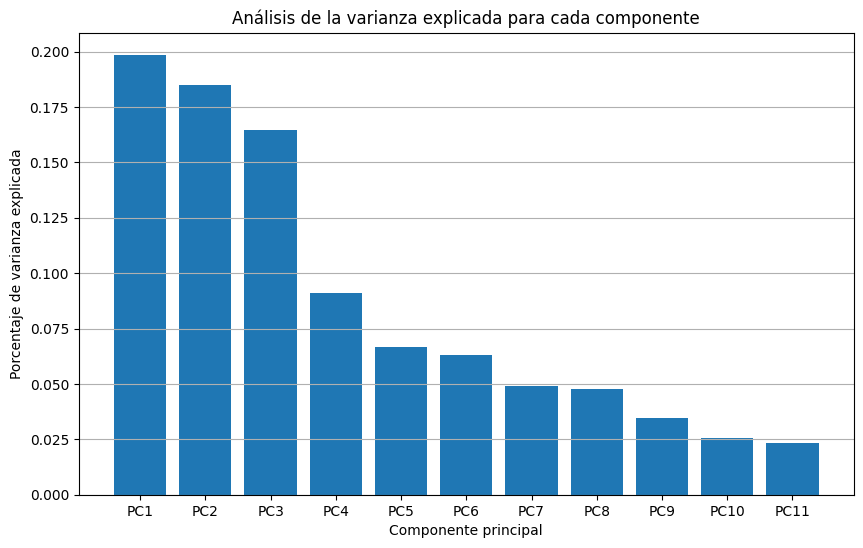

In [ ]:
explained_variance = [float(x) for x in explained_variance_formatted]  # Convertir a float

# Crear una lista con los nombres de los componentes principales
components = ['PC' + str(i+1) for i in range(len(explained_variance))]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance)
plt.xlabel('Componente principal')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Análisis de la varianza explicada para cada componente')
plt.grid(axis='y')
plt.show()

In [ ]:
suma_pca = 0
for i in explained_variance_formatted:
  suma_pca += float(i)

suma_pca

0.9494793396000002

In [ ]:
# Metricas generales de los modelos

for clf in models:
    clf.fit(X_train, y_train)
    print(clf)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test,y_pred)
    print(report)

DecisionTreeClassifier(max_depth=4, random_state=42)
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       904
           1       0.86      0.80      0.83      1213

    accuracy                           0.81      2117
   macro avg       0.80      0.81      0.81      2117
weighted avg       0.81      0.81      0.81      2117

RandomForestClassifier(max_depth=4, random_state=42)
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       904
           1       0.87      0.84      0.85      1213

    accuracy                           0.83      2117
   macro avg       0.83      0.83      0.83      2117
weighted avg       0.84      0.83      0.83      2117

KNeighborsClassifier(n_neighbors=23)
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       904
           1       0.84      0.81      0.83      1213

    accuracy                           

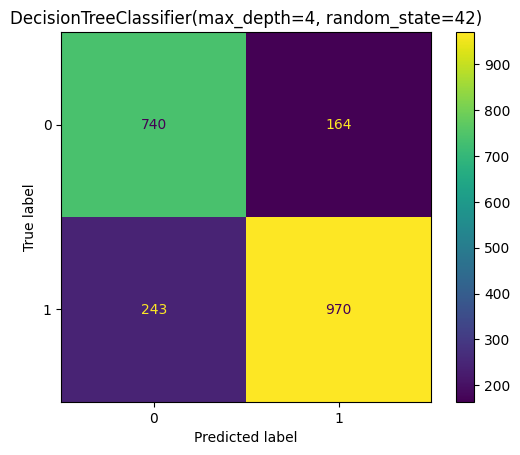

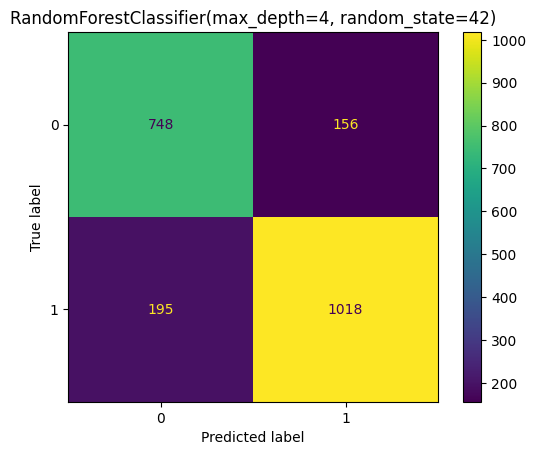

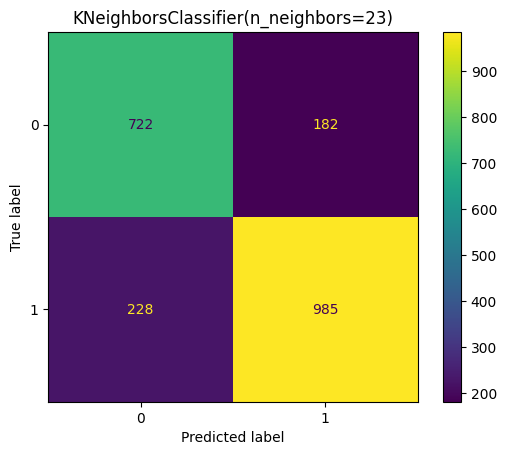

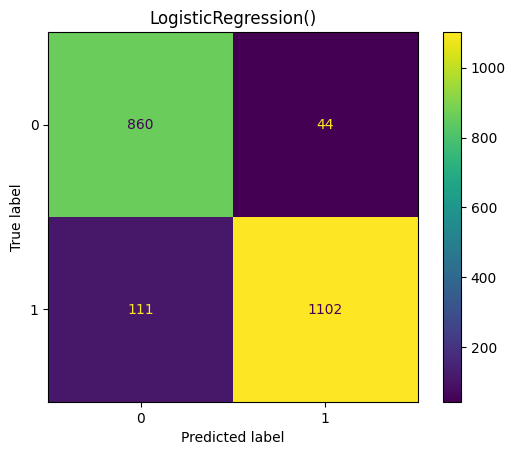

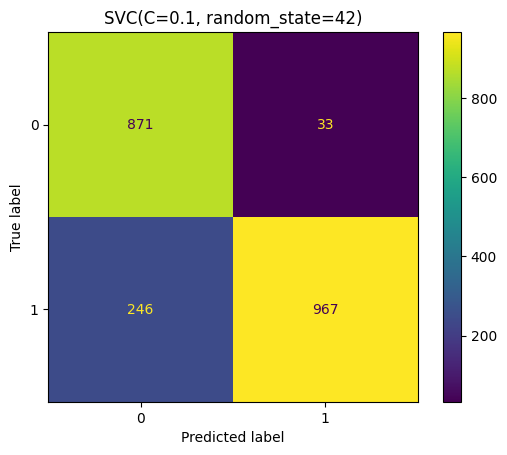

In [ ]:
# Matriz de confusion

for clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred,labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    disp.ax_.set_title(clf)
    plt.show()

# SN2

SN2 tiene como finalidad disminuir la cantidad de columnas del dataset y con ello visualizar las metricas obtenidas.

# SN2 - Hypetuning

In [ ]:
from sklearn.model_selection import GridSearchCV

**DecisionTreeClassifier**

In [ ]:
"""
params_grid_dtclass = {
        'max_depth': [1, 2, 3, 4, 5],
        'min_samples_split': [2, 3, 4, 5],
        'splitter': ['best','random'],
        'criterion':['entropy','gini',"log_loss"],
        'random_state': [42]
        }
"""

'\nparams_grid_dtclass = {\n        \'max_depth\': [1, 2, 3, 4, 5],\n        \'min_samples_split\': [2, 3, 4, 5],\n        \'splitter\': [\'best\',\'random\'],\n        \'criterion\':[\'entropy\',\'gini\',"log_loss"],\n        \'random_state\': [42]\n        }\n'

In [ ]:
"""
modelo_tree = DecisionTreeClassifier()
grid_cv = GridSearchCV(modelo_tree, params_grid_dtclass, scoring="accuracy", cv=5)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}')
"""

'\nmodelo_tree = DecisionTreeClassifier()\ngrid_cv = GridSearchCV(modelo_tree, params_grid_dtclass, scoring="accuracy", cv=5)\ngrid_cv.fit(X_train, y_train)\n\nprint("Mejores Parametros", grid_cv.best_params_)\nprint("Mejor CV score", grid_cv.best_score_)\nprint(f\'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}\')\n'

Mejores Parametros {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Mejor CV score 0.8197679140568278
Recall del modelo = 0.82028

In [ ]:
"""
arbol_de_decision = DecisionTreeClassifier(criterion = 'entropy',
                                           max_depth = 5,
                                           min_samples_split = 2,
                                           random_state = 42,
                                           splitter = 'best')
arbol_de_decision.fit(X_train, y_train) # entrenar al modelo
y_pred_tree_sn1 = arbol_de_decision.predict(X_test) # predicciones obtenidas
"""

"\narbol_de_decision = DecisionTreeClassifier(criterion = 'entropy',\n                                           max_depth = 5,\n                                           min_samples_split = 2,\n                                           random_state = 42,\n                                           splitter = 'best')\narbol_de_decision.fit(X_train, y_train) # entrenar al modelo\ny_pred_tree_sn1 = arbol_de_decision.predict(X_test) # predicciones obtenidas\n"

In [ ]:
"""
  # accuracy
print(accuracy_score(y_test, y_pred_tree_sn1))
  # precision
print(precision_score(y_test, y_pred_tree_sn1))
  # recall
print(recall_score(y_test, y_pred_tree_sn1))
  # f1
print(f1_score(y_test, y_pred_tree_sn1))
"""

'\n  # accuracy\nprint(accuracy_score(y_test, y_pred_tree_sn1))\n  # precision\nprint(precision_score(y_test, y_pred_tree_sn1))\n  # recall\nprint(recall_score(y_test, y_pred_tree_sn1))\n  # f1\nprint(f1_score(y_test, y_pred_tree_sn1))\n'

**RandomForestClassifier**

In [ ]:
"""
params_grid_RFC = {
        'n_estimators': [95,96,97,98,99,100,101,102],
        'max_depth': [2, 3, 4, 5],
        'min_samples_split': [2, 3, 4, 5],
        'criterion':['entropy','gini',"log_loss"],
        'random_state': [42]
        }
"""

'\nparams_grid_RFC = {\n        \'n_estimators\': [95,96,97,98,99,100,101,102],\n        \'max_depth\': [2, 3, 4, 5],\n        \'min_samples_split\': [2, 3, 4, 5],\n        \'criterion\':[\'entropy\',\'gini\',"log_loss"],\n        \'random_state\': [42]\n        }\n'

In [ ]:
"""
# tiempo de ejecucion promedio 27 minutos
RFC = RandomForestClassifier()
grid_cv = GridSearchCV(RFC, params_grid_RFC, scoring="accuracy", cv=5)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}')
"""

'\n# tiempo de ejecucion promedio 27 minutos\nRFC = RandomForestClassifier()\ngrid_cv = GridSearchCV(RFC, params_grid_RFC, scoring="accuracy", cv=5)\ngrid_cv.fit(X_train, y_train)\n\nprint("Mejores Parametros", grid_cv.best_params_)\nprint("Mejor CV score", grid_cv.best_score_)\nprint(f\'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}\')\n'

Mejores Parametros {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 95, 'random_state': 42}
Mejor CV score 0.8541952261997056
Recall del modelo = 0.84336

In [ ]:
"""
# Random Forest
random_forest = RandomForestClassifier(criterion = 'entropy',
                                       max_depth = 5,
                                       min_samples_split = 4,
                                       n_estimators = 98,
                                       random_state = 42)
random_forest.fit(X_train, y_train) # entrenar al modelo
y_pred_random_sn1 = arbol_de_decision.predict(X_test) # predicciones obtenidas
"""

"\n# Random Forest\nrandom_forest = RandomForestClassifier(criterion = 'entropy',\n                                       max_depth = 5,\n                                       min_samples_split = 4,\n                                       n_estimators = 98,\n                                       random_state = 42)\nrandom_forest.fit(X_train, y_train) # entrenar al modelo\ny_pred_random_sn1 = arbol_de_decision.predict(X_test) # predicciones obtenidas\n"

In [ ]:
"""
  # accuracy
print(accuracy_score(y_test, y_pred_random_sn1))
  # precision
print(precision_score(y_test, y_pred_random_sn1))
  # recall
print(recall_score(y_test, y_pred_random_sn1))
  # f1
print(f1_score(y_test, y_pred_random_sn1))
"""

'\n  # accuracy\nprint(accuracy_score(y_test, y_pred_random_sn1))\n  # precision\nprint(precision_score(y_test, y_pred_random_sn1))\n  # recall\nprint(recall_score(y_test, y_pred_random_sn1))\n  # f1\nprint(f1_score(y_test, y_pred_random_sn1))\n'

**LogisticRegression**

In [ ]:
"""
params_grid_LR = {
        'penalty' : ['l1', 'l2', 'elasticnet', None],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'multi_class' : ['auto', 'ovr', 'multinomial'],
        'random_state': [42]
        }
"""

"\nparams_grid_LR = {\n        'penalty' : ['l1', 'l2', 'elasticnet', None],\n        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],\n        'multi_class' : ['auto', 'ovr', 'multinomial'],\n        'random_state': [42]\n        }\n"

In [ ]:
"""
# tiempo de ejecucion promedio 30 seg
lg = LogisticRegression()
grid_cv = GridSearchCV(lg, params_grid_LR, scoring="accuracy", cv=5)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}')
"""

'\n# tiempo de ejecucion promedio 30 seg\nlg = LogisticRegression()\ngrid_cv = GridSearchCV(lg, params_grid_LR, scoring="accuracy", cv=5)\ngrid_cv.fit(X_train, y_train)\n\nprint("Mejores Parametros", grid_cv.best_params_)\nprint("Mejor CV score", grid_cv.best_score_)\nprint(f\'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}\')\n'

Mejores Parametros {'multi_class': 'auto', 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
Mejor CV score 0.9394486625729627
Recall del modelo = 0.92745

In [ ]:
"""
# {'multi_class': 'multinomial', 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
# Regresion logistica
regresion_logistica = LogisticRegression(multi_class = 'multinomial',
                                         penalty = "l1",
                                         random_state = 42,
                                         solver = 'saga')
regresion_logistica.fit(X_train, y_train) # entrenar al modelo
y_pred_regresion_sn1 = regresion_logistica.predict(X_test) # predicciones obtenidas
"""

'\n# {\'multi_class\': \'multinomial\', \'penalty\': \'l1\', \'random_state\': 42, \'solver\': \'saga\'}\n# Regresion logistica\nregresion_logistica = LogisticRegression(multi_class = \'multinomial\',\n                                         penalty = "l1",\n                                         random_state = 42,\n                                         solver = \'saga\')\nregresion_logistica.fit(X_train, y_train) # entrenar al modelo\ny_pred_regresion_sn1 = regresion_logistica.predict(X_test) # predicciones obtenidas\n'

In [ ]:
"""
  # accuracy
print(accuracy_score(y_test, y_pred_regresion_sn1))
  # precision
print(precision_score(y_test, y_pred_regresion_sn1))
  # recall
print(recall_score(y_test, y_pred_regresion_sn1))
  # f1
print(f1_score(y_test, y_pred_regresion_sn1))
"""

'\n  # accuracy\nprint(accuracy_score(y_test, y_pred_regresion_sn1))\n  # precision\nprint(precision_score(y_test, y_pred_regresion_sn1))\n  # recall\nprint(recall_score(y_test, y_pred_regresion_sn1))\n  # f1\nprint(f1_score(y_test, y_pred_regresion_sn1))\n'

In [ ]:
"""
# Medimos bias-variance tradeoff para corroborar
otro, bias, variance = bias_variance_decomp(regresion_logistica, X_train, y_train.values, X_test, y_test.values,
                                           random_seed=42)
print("Average Bias : ", bias)
print("Average Variance : ", variance)
"""

'\n# Medimos bias-variance tradeoff para corroborar\notro, bias, variance = bias_variance_decomp(regresion_logistica, X_train, y_train.values, X_test, y_test.values,\n                                           random_seed=42)\nprint("Average Bias : ", bias)\nprint("Average Variance : ", variance)\n'

**KNeighborsClassifier**

In [ ]:
"""
params_grid_knn = {
        'n_neighbors' : [5, 10, 20, 30, 33, 40, 50, 60],
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1,2]
        }
"""

"\nparams_grid_knn = {\n        'n_neighbors' : [5, 10, 20, 30, 33, 40, 50, 60],\n        'weights' : ['uniform', 'distance'],\n        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],\n        'p': [1,2]\n        }\n"

In [ ]:
"""
# tiempo de ejecucion promedio  seg
kn = KNeighborsClassifier()
grid_cv = GridSearchCV(kn, params_grid_knn, scoring="accuracy", cv=5)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}')
"""

'\n# tiempo de ejecucion promedio  seg\nkn = KNeighborsClassifier()\ngrid_cv = GridSearchCV(kn, params_grid_knn, scoring="accuracy", cv=5)\ngrid_cv.fit(X_train, y_train)\n\nprint("Mejores Parametros", grid_cv.best_params_)\nprint("Mejor CV score", grid_cv.best_score_)\nprint(f\'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}\')\n'

Mejores Parametros {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Mejor CV score 0.8230051396904698
Recall del modelo = 0.8244

**SVC**

In [ ]:
"""
params_grid_svc = {
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma' : ['scale', 'auto'],
        'degree' : [2, 3, 4, 5],
        'random_state': [42],
        'C': [0.1,0.2,0.3,0.4,0.5]
        }
"""

"\nparams_grid_svc = {\n        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],\n        'gamma' : ['scale', 'auto'],\n        'degree' : [2, 3, 4, 5],\n        'random_state': [42],\n        'C': [0.1,0.2,0.3,0.4,0.5]\n        }\n"

In [ ]:
"""
# tiempo de ejecucion promedio 737 seg
svc = SVC()
grid_cv = GridSearchCV(svc, params_grid_svc, scoring="accuracy", cv=5)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}')
"""


'\n# tiempo de ejecucion promedio 737 seg\nsvc = SVC()\ngrid_cv = GridSearchCV(svc, params_grid_svc, scoring="accuracy", cv=5)\ngrid_cv.fit(X_train, y_train)\n\nprint("Mejores Parametros", grid_cv.best_params_)\nprint("Mejor CV score", grid_cv.best_score_)\nprint(f\'Recall del modelo = {round(recall_score(y_test, grid_cv.predict(X_test)), 5)}\')\n'

Mejores Parametros {'C': 0.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 42}
Mejor CV score 0.9242607336672286
Recall del modelo = 0.89777

# SN2 - Modelos con hypertunning

In [ ]:
# Declaracion de los diferentes modelos

# Mejores Parametros {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
# Arbol de decision
arbol_de_decision = DecisionTreeClassifier(criterion = 'gini',
                                           max_depth = 5,
                                           min_samples_split = 2,
                                           random_state = 42,
                                           splitter = 'best')
# Mejores Parametros {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 95, 'random_state': 42}
# Random Forest
random_forest = RandomForestClassifier(criterion = 'entropy',
                                       max_depth = 5,
                                       min_samples_split = 5,
                                       n_estimators = 95,
                                       random_state = 42)

# Mejores Parametros {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
# Vecinos mas cercanos
knn = KNeighborsClassifier(algorithm = 'auto',
                           n_neighbors = 10,
                           p = 2,
                           weights = 'distance')

#Mejores Parametros {'multi_class': 'auto', 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
# Regresion logistica
regresion_logistica = LogisticRegression(multi_class = 'auto',
                                         penalty = "l1",
                                         random_state = 42,
                                         solver = 'saga')

# Mejores Parametros {'C': 0.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 42}
# Super vector machine
svc = SVC(C = 0.5, degree = 2, gamma = 'scale', kernel = 'linear', random_state = 42)

# Se almacena en una lista para despues poder recorrerlos con un for
models_hiper = [arbol_de_decision, random_forest, knn, regresion_logistica, svc]

# SN2 - Entrenar modelos

In [ ]:
# Metricas generales de los modelos
metricas_sn2 = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
}
y_pred_regresion_sn2 = None
for clf in models_hiper:
    clf.fit(X_train, y_train)
    print(clf)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test,y_pred)
    metricas_sn2['accuracy'].append(accuracy_score(y_test, y_pred))
    metricas_sn2['precision'].append(precision_score(y_test, y_pred))
    metricas_sn2['recall'].append(recall_score(y_test, y_pred))
    metricas_sn2['f1'].append(f1_score(y_test, y_pred))
    if (clf == regresion_logistica):
      y_pred_regresion_sn2 = y_pred

DecisionTreeClassifier(max_depth=5, random_state=42)
RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       n_estimators=95, random_state=42)
KNeighborsClassifier(n_neighbors=10, weights='distance')
LogisticRegression(penalty='l1', random_state=42, solver='saga')
SVC(C=0.5, degree=2, kernel='linear', random_state=42)


In [ ]:
# guardar en un dataset las metricas de los diferentes modelos
df_metricas_sn2 = pd.DataFrame(metricas_sn2)
# obtener el nombre de cada modelo y establecerlo como indice
nombre_modelos = [model.__class__.__name__ for model in models_hiper]
df_metricas_sn2.index = nombre_modelos
# dar vuelta el dataset
df_metricas_sn2 = df_metricas_sn2.transpose()

In [ ]:
grafico_metricas(df_metricas_sn2)

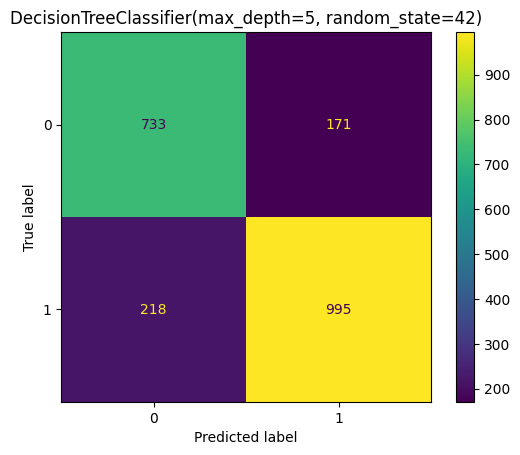

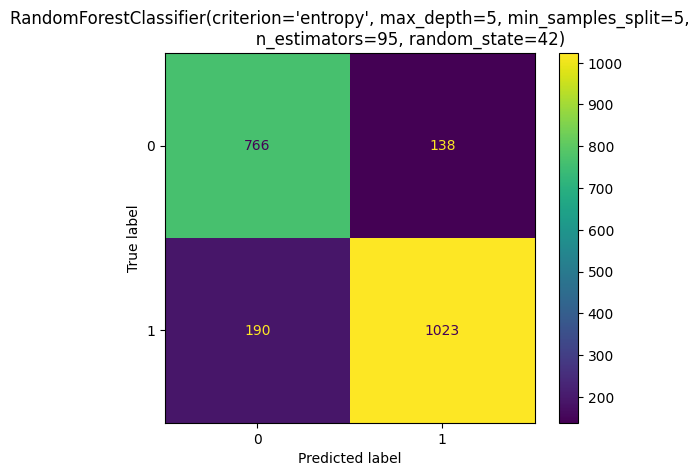

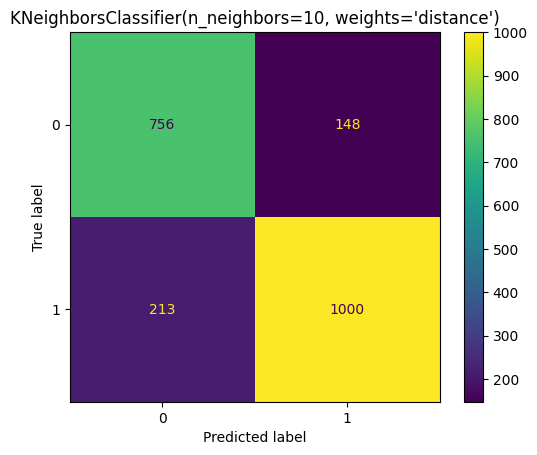

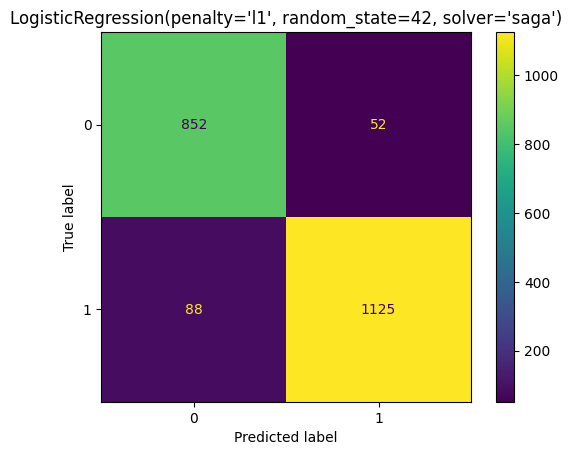

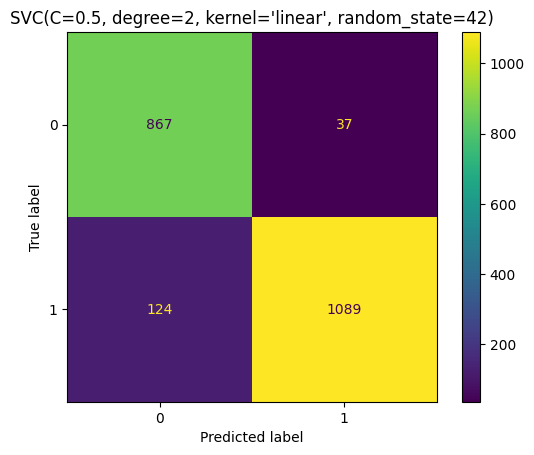

In [ ]:
# Matriz de confusion

for clf in models_hiper:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred,labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    disp.ax_.set_title(clf)
    plt.show()

# SN2 - Cross-validation

Con la finalidad de obtener mayor información sobre el desempeño de los modelos se realiza un cross_validation.

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate
# metricas que son de interes
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}
# declarando el modelo stratified K-Fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Diccionario para almacenar las metricas obtenidas
resultado_modelos_cv_sn2 = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# iteraciones por cada modelo
for i in models_hiper:
  resultados = cross_validate(i, X_train, y_train, cv=skf, scoring = scoring)
  # almacenar las metricas en el diccionario
  resultado_modelos_cv_sn2['accuracy'].append(resultados['test_accuracy'].mean())
  resultado_modelos_cv_sn2['precision'].append(resultados['test_precision'].mean())
  resultado_modelos_cv_sn2['recall'].append(resultados['test_recall'].mean())
  resultado_modelos_cv_sn2['f1'].append(resultados['test_f1'].mean())


In [ ]:
# crear un dataframe para visualizar las metricas obtenidas
sn2_cv = pd.DataFrame(resultado_modelos_cv_sn2)
# nombre de los modelos y establecerlo como indice
nombres_modelos = [model.__class__.__name__ for model in models_hiper]
sn2_cv.index = nombres_modelos
# dar vuelta el dataframe
sn2_cv = sn2_cv.transpose()

In [ ]:
grafico_metricas(sn2_cv)

# Conclusión

Luego de explorar los diferentes modelos, aplicandole todos los procedimientos anteriores; se condiera que el mejor para responder a la pregunta principal planteada al inicio del problema es el modelo de Regresión Logistica.

Si bien SVC muestra un mayor porcentaje en relación a la metrica "precision"(metrica de mayor interes), la realidad es que no representa una variación significativa con la regresión logistica. Este último modelo es mas eficiente en terminos de recursos computacionales que SVC; por lo tanto, se optó por esa decisión.

In [ ]:
# Extraer los valores de la columna "LogisticRegression"
values = sn2_cv['LogisticRegression'].values

# Extraer los nombres de las métricas del índice
metrics = sn2_cv.index

# Crear el gráfico de barras
fig = go.Figure(data=[go.Bar(x=metrics, y=values, marker_color='#d62728')])

# Añadir títulos y etiquetas
fig.update_layout(title_text='Métricas de rendimiento para LogisticRegression',
                  xaxis_title='Métrica',
                  yaxis_title='Valor')

# Mostrar el gráfico
fig.show()

Con la finalidad de ponderar si es la decisión correcta del modelo, se realizará nuevamente el tradeoff bias-variance.

In [ ]:
# Medimos bias-variance tradeoff para corroborar
otro, bias, variance = bias_variance_decomp(regresion_logistica, X_train, y_train.values, X_test, y_test.values,
                                           random_seed=42)
print("Average Bias : ", bias)
print("Average Variance : ", variance)

Average Bias :  0.06565895134624469
Average Variance :  0.010151157298063297


Average Bias :  0.06565895134624469

Average Variance :  0.010151157298063297

Los valores que devuelve el metodo bias_variance_decomp son cercanos a 0; por lo tanto, el modelo no se está sobreajustando.

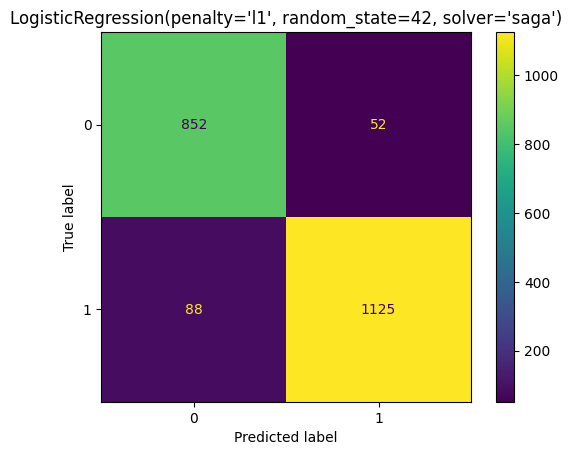

In [ ]:
# Matriz de confusion
cm_regresion = confusion_matrix(y_test, y_pred_regresion_sn2,labels=regresion_logistica.classes_)
disp_regresion = ConfusionMatrixDisplay(confusion_matrix=cm_regresion, display_labels=regresion_logistica.classes_)
disp_regresion.plot()
disp_regresion.ax_.set_title(regresion_logistica)
plt.show()